In [1]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '/home/todor/emotion_recognition/facenet')
from facenet.src.load_model import *

In [2]:
X_train = np.load('data/SFEW_2/Train/train_aug2.npy')
y_train = np.load('data/SFEW_2/Train/train_aug2_labels.npy')
X_val = np.load('data/SFEW_2/Val/val.npy')
y_val = np.load('data/SFEW_2/Val/val_labels.npy')

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

print X_train.shape
print y_train.shape
print X_val.shape
print y_val.shape

(1751, 160, 160, 3)
(1751,)
(431, 160, 160, 3)
(431,)


In [26]:
tf.reset_default_graph()

In [27]:
load_model('facenet/pre-trained/20170511-185253.pb')
X = tf.get_default_graph().get_tensor_by_name('input:0')
y = tf.placeholder(tf.int64, [None])
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
frozen_net_output = tf.get_default_graph().get_tensor_by_name('InceptionResnetV1/Logits/Dropout/cond/Merge:0')



#dense1 = tf.layers.dense(frozen_net_output, 512, activation=tf.nn.relu)
y_out = tf.layers.dense(frozen_net_output, 7)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,7),logits=y_out))
optimizer = tf.train.AdamOptimizer(5e-4)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(loss)

In [28]:
session = tf.Session()

session.run(tf.global_variables_initializer())

In [6]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    
    correct_prediction = tf.equal(tf.argmax(predict, 1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    train_indices = np.arange(Xd.shape[0])
    np.random.shuffle(train_indices)

    variables = [loss_val, correct_prediction, accuracy]
    
    training_now = training is not None
    if training_now:
        variables[-1] = training

    iter_cnt = 0

    for e in xrange(epochs):
        correct = 0
        losses = []
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indices[start_idx:start_idx+batch_size]



            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],}
                         #phase_train_placeholder: False}
            # get batch size
            actual_batch_size = yd[i:i+batch_size].shape[0]

            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            output = session.run(variables,feed_dict=feed_dict)
            loss = output[0]
            corr = output[1]
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += float(np.sum(corr))

            # print every now and then
            if (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,float(np.sum(corr))/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print total_correct
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()

Iteration 0: with minibatch training loss = 1.12 and accuracy of 0.59
Iteration 20: with minibatch training loss = 1.08 and accuracy of 0.66
0.636207881211
Epoch 1, Overall loss = 1.03 and accuracy of 0.636


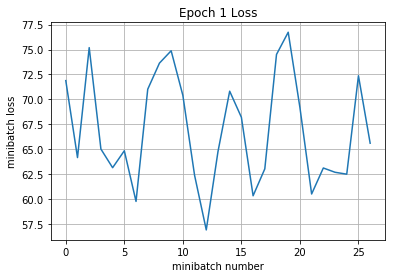

Iteration 40: with minibatch training loss = 0.993 and accuracy of 0.7
0.644203312393
Epoch 2, Overall loss = 1.02 and accuracy of 0.644


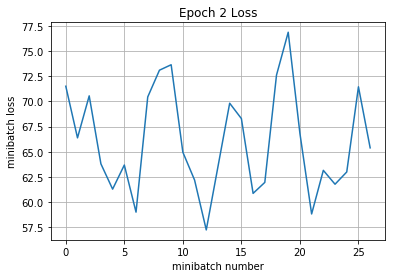

Iteration 60: with minibatch training loss = 0.921 and accuracy of 0.75
Iteration 80: with minibatch training loss = 1.02 and accuracy of 0.64
0.646487721302
Epoch 3, Overall loss = 1.02 and accuracy of 0.646


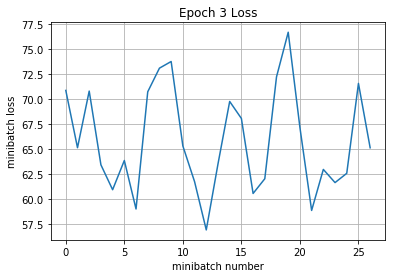

Iteration 100: with minibatch training loss = 1.2 and accuracy of 0.59
0.646487721302
Epoch 4, Overall loss = 1.01 and accuracy of 0.646


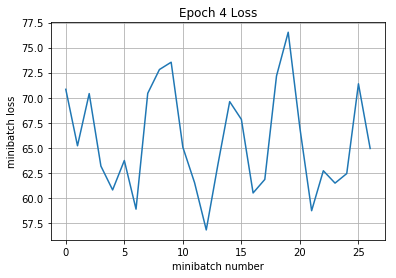

Iteration 120: with minibatch training loss = 0.886 and accuracy of 0.72
0.650485436893
Epoch 5, Overall loss = 1.01 and accuracy of 0.65


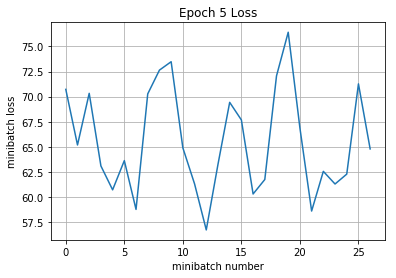

Iteration 140: with minibatch training loss = 0.993 and accuracy of 0.73
Iteration 160: with minibatch training loss = 1.11 and accuracy of 0.64
0.649914334666
Epoch 6, Overall loss = 1.01 and accuracy of 0.65


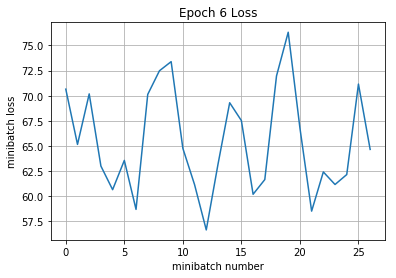

Iteration 180: with minibatch training loss = 1.12 and accuracy of 0.64
0.650485436893
Epoch 7, Overall loss = 1.01 and accuracy of 0.65


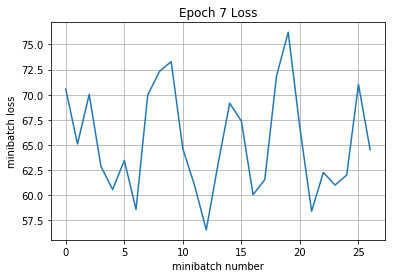

Iteration 200: with minibatch training loss = 0.95 and accuracy of 0.75
0.651627641348
Epoch 8, Overall loss = 1.01 and accuracy of 0.652


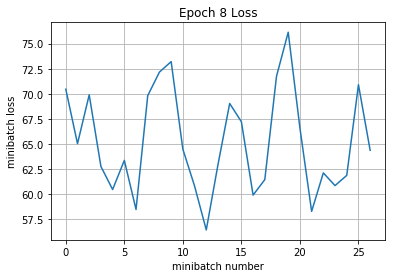

Iteration 220: with minibatch training loss = 0.944 and accuracy of 0.67
Iteration 240: with minibatch training loss = 0.965 and accuracy of 0.69
0.651056539121
Epoch 9, Overall loss = 1 and accuracy of 0.651


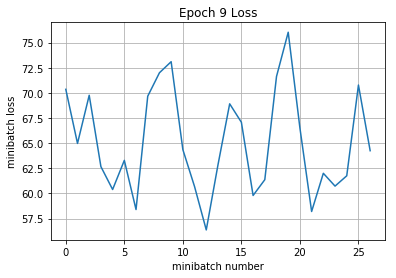

Iteration 260: with minibatch training loss = 0.957 and accuracy of 0.62
0.651056539121
Epoch 10, Overall loss = 1 and accuracy of 0.651


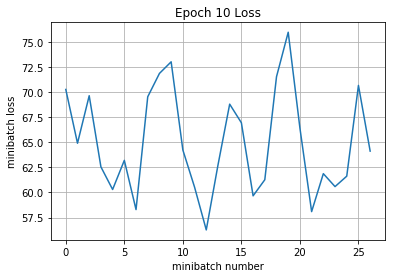

Iteration 280: with minibatch training loss = 1 and accuracy of 0.67
0.65334094803
Epoch 11, Overall loss = 1 and accuracy of 0.653


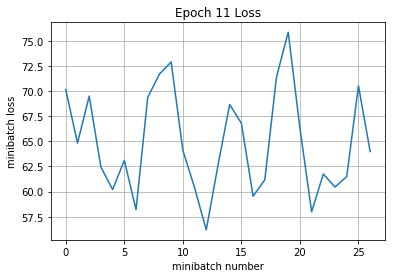

Iteration 300: with minibatch training loss = 0.974 and accuracy of 0.69
Iteration 320: with minibatch training loss = 0.942 and accuracy of 0.69
0.65334094803
Epoch 12, Overall loss = 0.999 and accuracy of 0.653


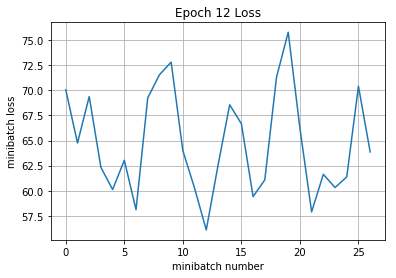

Iteration 340: with minibatch training loss = 0.927 and accuracy of 0.72
0.653912050257
Epoch 13, Overall loss = 0.997 and accuracy of 0.654


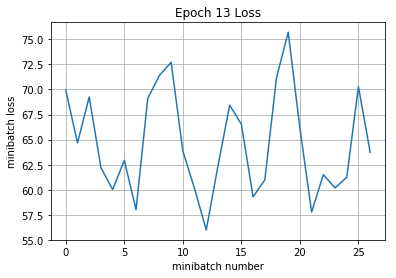

Iteration 360: with minibatch training loss = 1.13 and accuracy of 0.61
0.655625356939
Epoch 14, Overall loss = 0.995 and accuracy of 0.656


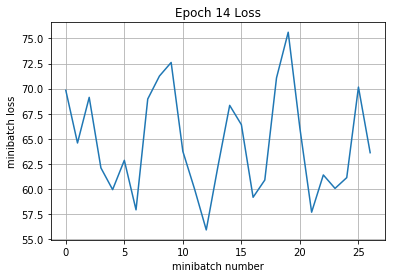

Iteration 380: with minibatch training loss = 1.08 and accuracy of 0.66
Iteration 400: with minibatch training loss = 0.958 and accuracy of 0.66
0.657338663621
Epoch 15, Overall loss = 0.994 and accuracy of 0.657


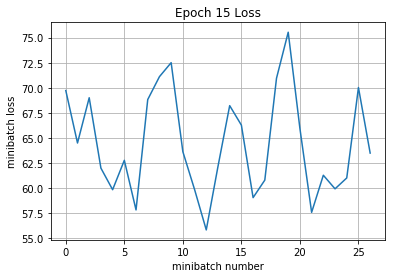

Iteration 420: with minibatch training loss = 1.03 and accuracy of 0.58
0.658480868075
Epoch 16, Overall loss = 0.992 and accuracy of 0.658


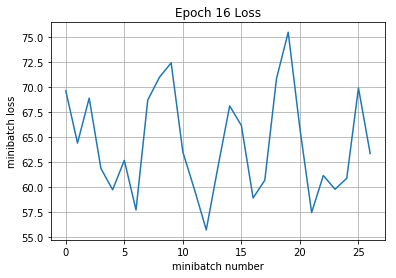

Iteration 440: with minibatch training loss = 1.11 and accuracy of 0.59
0.659051970303
Epoch 17, Overall loss = 0.99 and accuracy of 0.659


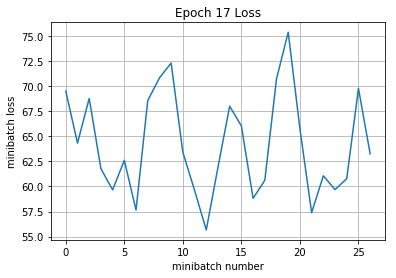

Iteration 460: with minibatch training loss = 1 and accuracy of 0.7
Iteration 480: with minibatch training loss = 0.895 and accuracy of 0.72
0.65962307253
Epoch 18, Overall loss = 0.988 and accuracy of 0.66


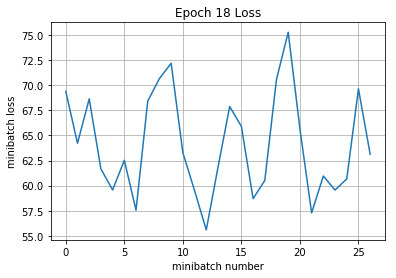

Iteration 500: with minibatch training loss = 1.06 and accuracy of 0.64
0.660765276985
Epoch 19, Overall loss = 0.987 and accuracy of 0.661


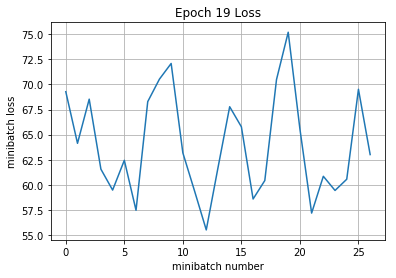

Iteration 520: with minibatch training loss = 1.06 and accuracy of 0.64
0.661907481439
Epoch 20, Overall loss = 0.985 and accuracy of 0.662


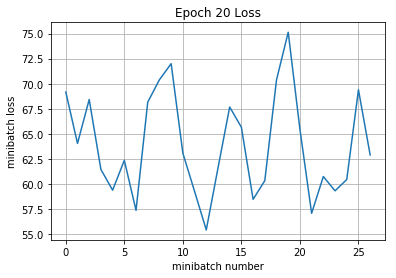

Iteration 540: with minibatch training loss = 1.08 and accuracy of 0.61
Iteration 560: with minibatch training loss = 1.02 and accuracy of 0.66
0.660765276985
Epoch 21, Overall loss = 0.984 and accuracy of 0.661


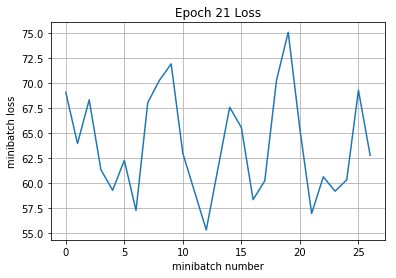

Iteration 580: with minibatch training loss = 0.959 and accuracy of 0.7
0.660765276985
Epoch 22, Overall loss = 0.982 and accuracy of 0.661


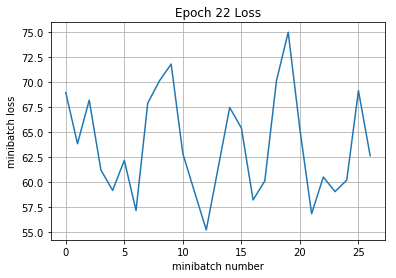

Iteration 600: with minibatch training loss = 0.892 and accuracy of 0.73
Iteration 620: with minibatch training loss = 0.977 and accuracy of 0.66
0.661907481439
Epoch 23, Overall loss = 0.98 and accuracy of 0.662


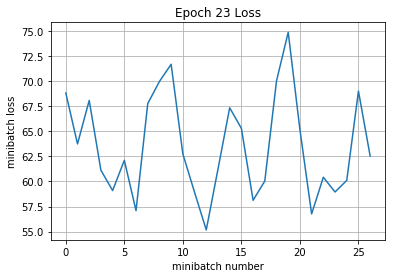

Iteration 640: with minibatch training loss = 1.17 and accuracy of 0.61
0.663049685894
Epoch 24, Overall loss = 0.979 and accuracy of 0.663


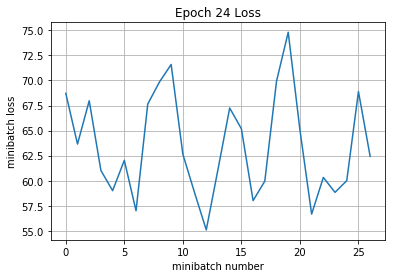

Iteration 660: with minibatch training loss = 0.859 and accuracy of 0.73
0.663620788121
Epoch 25, Overall loss = 0.977 and accuracy of 0.664


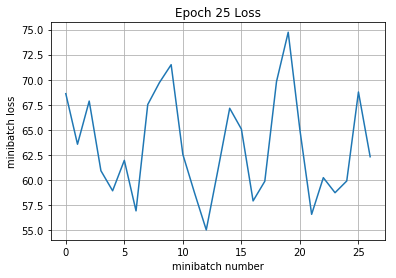

Iteration 680: with minibatch training loss = 0.967 and accuracy of 0.75
Iteration 700: with minibatch training loss = 1.07 and accuracy of 0.64
0.663620788121
Epoch 26, Overall loss = 0.975 and accuracy of 0.664


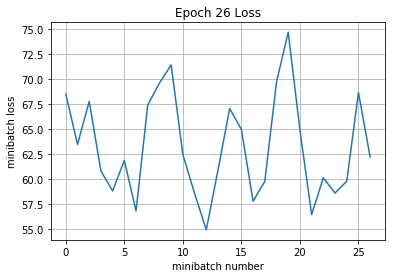

Iteration 720: with minibatch training loss = 1.09 and accuracy of 0.67
0.664191890348
Epoch 27, Overall loss = 0.974 and accuracy of 0.664


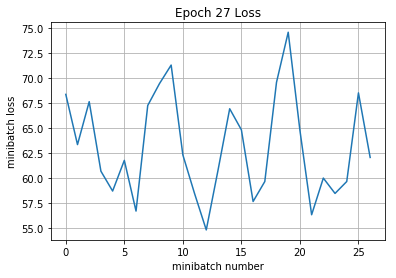

Iteration 740: with minibatch training loss = 0.912 and accuracy of 0.75
0.666476299258
Epoch 28, Overall loss = 0.972 and accuracy of 0.666


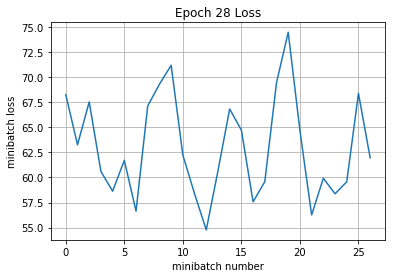

Iteration 760: with minibatch training loss = 0.915 and accuracy of 0.69
Iteration 780: with minibatch training loss = 0.929 and accuracy of 0.7
0.667618503712
Epoch 29, Overall loss = 0.971 and accuracy of 0.668


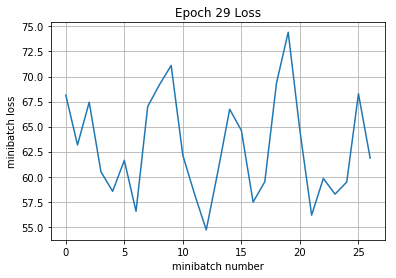

Iteration 800: with minibatch training loss = 0.928 and accuracy of 0.64
0.667047401485
Epoch 30, Overall loss = 0.969 and accuracy of 0.667


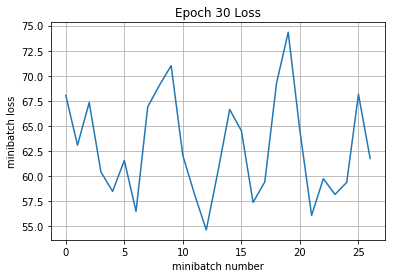

Iteration 820: with minibatch training loss = 0.968 and accuracy of 0.67
0.668189605939
Epoch 31, Overall loss = 0.967 and accuracy of 0.668


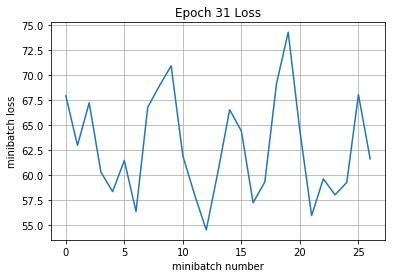

Iteration 840: with minibatch training loss = 0.941 and accuracy of 0.72
Iteration 860: with minibatch training loss = 0.905 and accuracy of 0.69
0.668760708167
Epoch 32, Overall loss = 0.966 and accuracy of 0.669


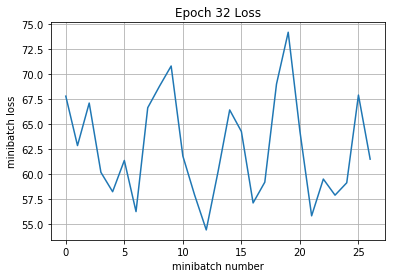

Iteration 880: with minibatch training loss = 0.891 and accuracy of 0.72
0.669331810394
Epoch 33, Overall loss = 0.964 and accuracy of 0.669


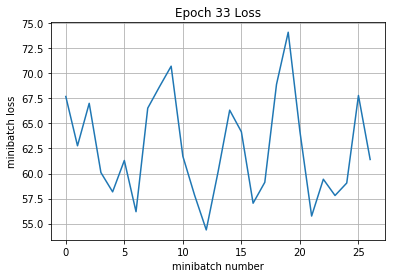

Iteration 900: with minibatch training loss = 1.1 and accuracy of 0.64
0.669331810394
Epoch 34, Overall loss = 0.963 and accuracy of 0.669


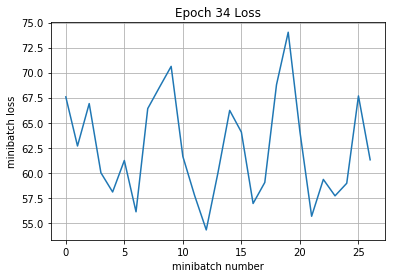

Iteration 920: with minibatch training loss = 1.04 and accuracy of 0.67
Iteration 940: with minibatch training loss = 0.926 and accuracy of 0.64
0.669331810394
Epoch 35, Overall loss = 0.961 and accuracy of 0.669


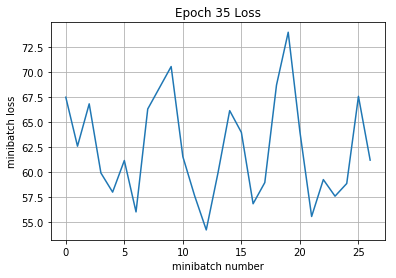

Iteration 960: with minibatch training loss = 0.997 and accuracy of 0.59
0.669902912621
Epoch 36, Overall loss = 0.96 and accuracy of 0.67


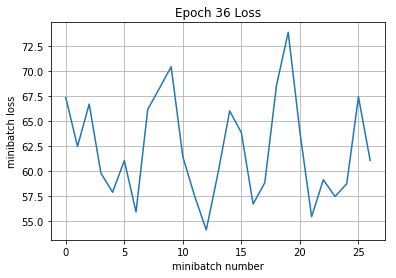

Iteration 980: with minibatch training loss = 1.06 and accuracy of 0.59
0.671045117076
Epoch 37, Overall loss = 0.958 and accuracy of 0.671


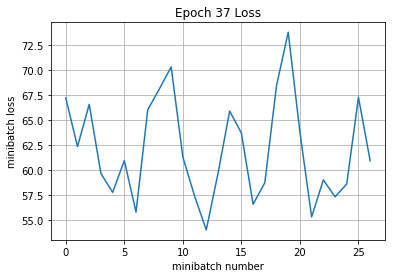

Iteration 1000: with minibatch training loss = 0.973 and accuracy of 0.7
Iteration 1020: with minibatch training loss = 0.863 and accuracy of 0.75
0.671045117076
Epoch 38, Overall loss = 0.956 and accuracy of 0.671


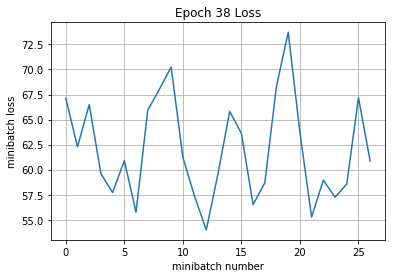

Iteration 1040: with minibatch training loss = 1.03 and accuracy of 0.64
0.672758423758
Epoch 39, Overall loss = 0.955 and accuracy of 0.673


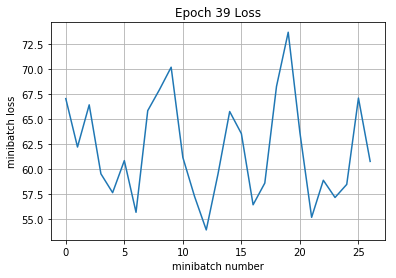

Iteration 1060: with minibatch training loss = 1.03 and accuracy of 0.66
0.675042832667
Epoch 40, Overall loss = 0.953 and accuracy of 0.675


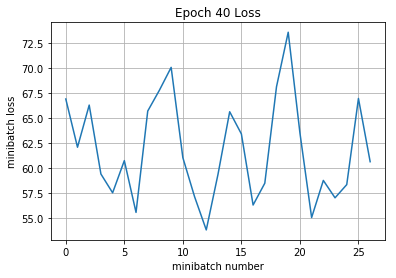

Iteration 1080: with minibatch training loss = 1.04 and accuracy of 0.61
Iteration 1100: with minibatch training loss = 0.991 and accuracy of 0.69
0.675613934894
Epoch 41, Overall loss = 0.952 and accuracy of 0.676


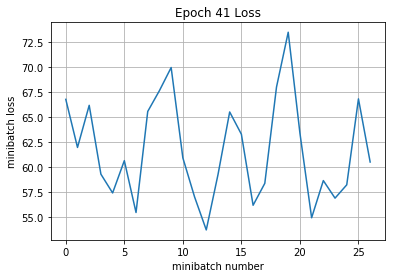

Iteration 1120: with minibatch training loss = 0.924 and accuracy of 0.72
0.676756139349
Epoch 42, Overall loss = 0.95 and accuracy of 0.677


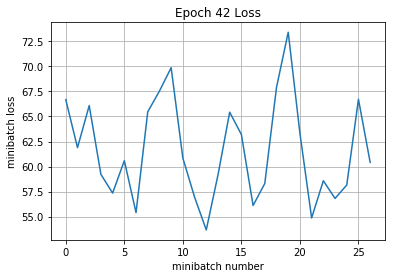

Iteration 1140: with minibatch training loss = 0.864 and accuracy of 0.73
Iteration 1160: with minibatch training loss = 0.942 and accuracy of 0.7
0.677327241576
Epoch 43, Overall loss = 0.949 and accuracy of 0.677


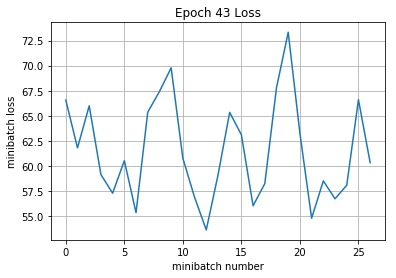

Iteration 1180: with minibatch training loss = 1.14 and accuracy of 0.64
0.677327241576
Epoch 44, Overall loss = 0.947 and accuracy of 0.677


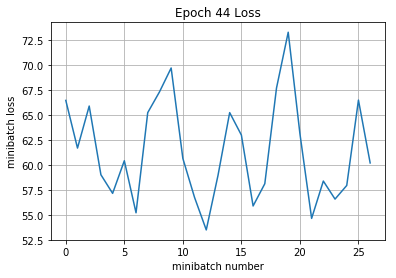

Iteration 1200: with minibatch training loss = 0.835 and accuracy of 0.75
0.678469446031
Epoch 45, Overall loss = 0.946 and accuracy of 0.678


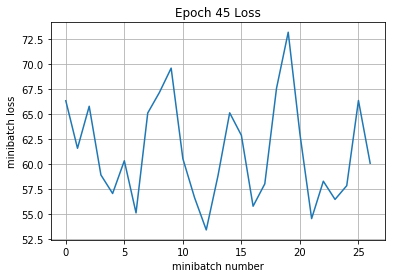

Iteration 1220: with minibatch training loss = 0.942 and accuracy of 0.78
Iteration 1240: with minibatch training loss = 1.04 and accuracy of 0.66
0.679611650485
Epoch 46, Overall loss = 0.944 and accuracy of 0.68


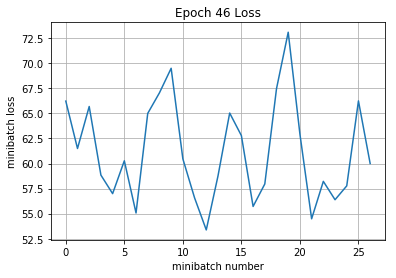

Iteration 1260: with minibatch training loss = 1.05 and accuracy of 0.69
0.681324957167
Epoch 47, Overall loss = 0.943 and accuracy of 0.681


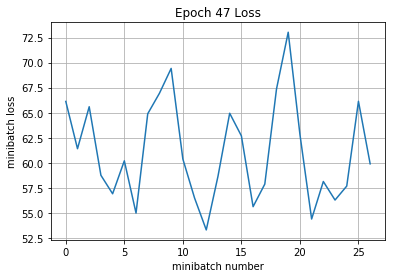

Iteration 1280: with minibatch training loss = 0.881 and accuracy of 0.78
0.681896059395
Epoch 48, Overall loss = 0.941 and accuracy of 0.682


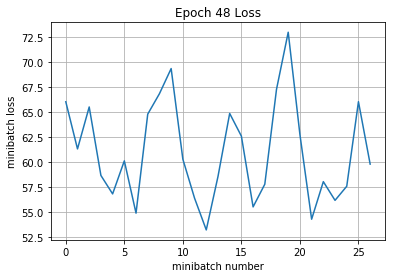

Iteration 1300: with minibatch training loss = 0.886 and accuracy of 0.67
Iteration 1320: with minibatch training loss = 0.898 and accuracy of 0.73
0.682467161622
Epoch 49, Overall loss = 0.94 and accuracy of 0.682


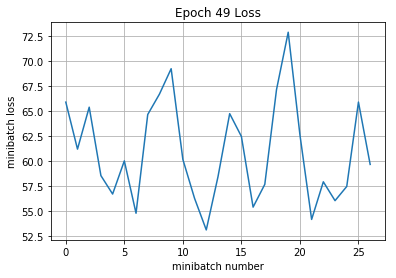

Iteration 1340: with minibatch training loss = 0.9 and accuracy of 0.66
0.683038263849
Epoch 50, Overall loss = 0.938 and accuracy of 0.683


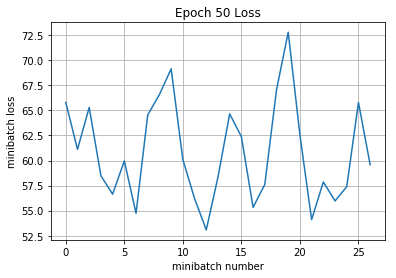

In [54]:
run_model(session, y_out, loss, X_train, y_train, 
          epochs=50, batch_size=64, print_every=20, training = train_step, plot_losses=True)

In [55]:
run_model(session, y_out, loss, X_val, y_val, 1, batch_size=5, print_every=20)

Iteration 0: with minibatch training loss = 1.77 and accuracy of 0.4
Iteration 20: with minibatch training loss = 2.73 and accuracy of 0
Iteration 40: with minibatch training loss = 2.89 and accuracy of 0.2
Iteration 60: with minibatch training loss = 2.6 and accuracy of 0
Iteration 80: with minibatch training loss = 2.03 and accuracy of 0.4
0.259860788863
Epoch 1, Overall loss = 2.28 and accuracy of 0.26


In [9]:
tf.reset_default_graph()

In [10]:
load_model('facenet/pre-trained/20170511-185253.pb')
X = tf.get_default_graph().get_tensor_by_name('input:0')
y = tf.placeholder(tf.int64, [None])
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
frozen_net_output = tf.get_default_graph().get_tensor_by_name('InceptionResnetV1/Bottleneck/BatchNorm/batchnorm/add_1:0')



dense1 = tf.layers.dense(frozen_net_output, 256, activation=tf.nn.relu)
y_out = tf.layers.dense(dense1, 7)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,7),logits=y_out))
optimizer = tf.train.AdamOptimizer(5e-4)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(loss)

In [11]:
session = tf.Session()

session.run(tf.global_variables_initializer())

Iteration 0: with minibatch training loss = 1.42 and accuracy of 0.5
0.427755568247
Epoch 1, Overall loss = 1.47 and accuracy of 0.428


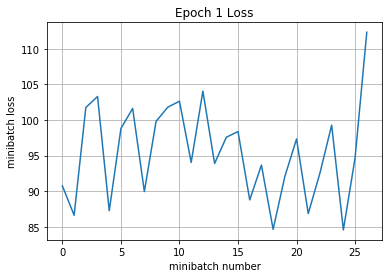

Iteration 50: with minibatch training loss = 1.53 and accuracy of 0.34
0.416904625928
Epoch 2, Overall loss = 1.47 and accuracy of 0.417


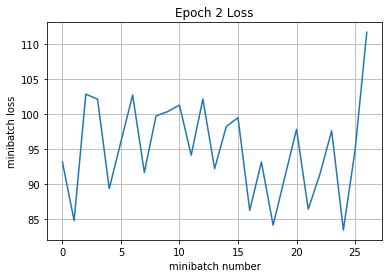

0.422044545974
Epoch 3, Overall loss = 1.46 and accuracy of 0.422


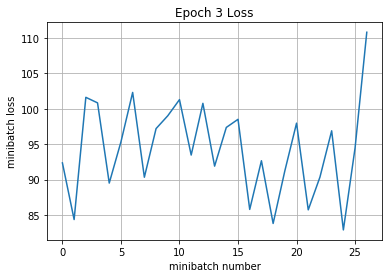

Iteration 100: with minibatch training loss = 1.41 and accuracy of 0.45
0.423186750428
Epoch 4, Overall loss = 1.45 and accuracy of 0.423


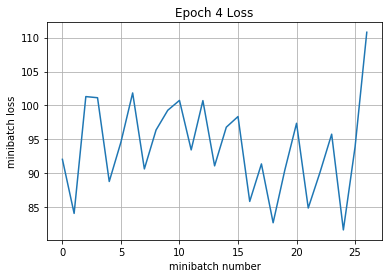

0.432324386065
Epoch 5, Overall loss = 1.44 and accuracy of 0.432


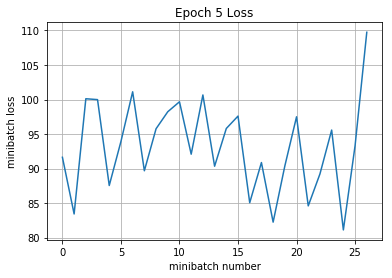

Iteration 150: with minibatch training loss = 1.52 and accuracy of 0.42
0.434608794974
Epoch 6, Overall loss = 1.43 and accuracy of 0.435


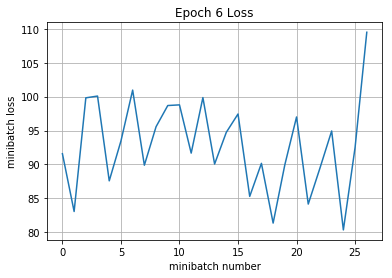

0.440890919475
Epoch 7, Overall loss = 1.42 and accuracy of 0.441


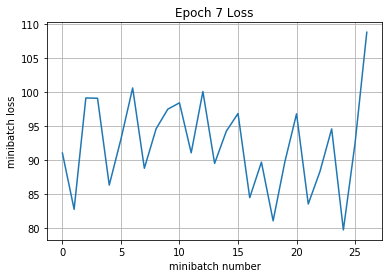

Iteration 200: with minibatch training loss = 1.41 and accuracy of 0.47
0.439177612793
Epoch 8, Overall loss = 1.42 and accuracy of 0.439


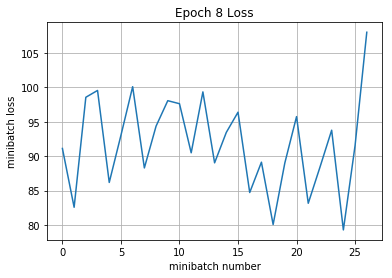

0.448886350657
Epoch 9, Overall loss = 1.41 and accuracy of 0.449


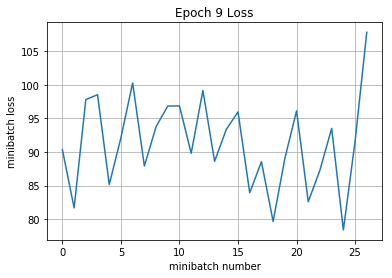

Iteration 250: with minibatch training loss = 1.37 and accuracy of 0.5
0.444888635066
Epoch 10, Overall loss = 1.4 and accuracy of 0.445


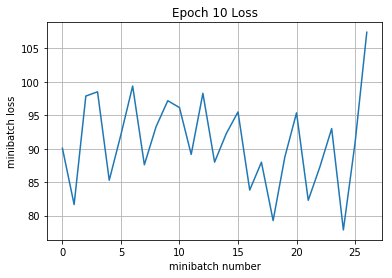

0.458023986294
Epoch 11, Overall loss = 1.4 and accuracy of 0.458


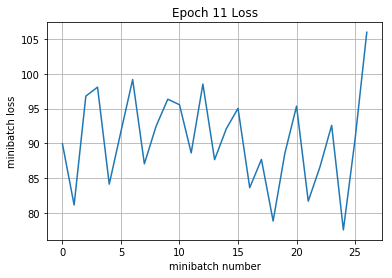

Iteration 300: with minibatch training loss = 1.53 and accuracy of 0.38
0.455739577384
Epoch 12, Overall loss = 1.39 and accuracy of 0.456


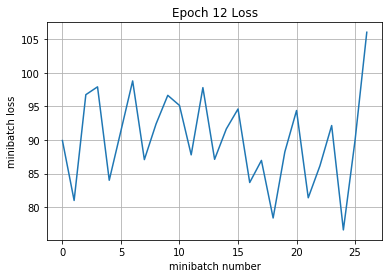

Iteration 350: with minibatch training loss = 1.64 and accuracy of 0.3
0.463735008567
Epoch 13, Overall loss = 1.38 and accuracy of 0.464


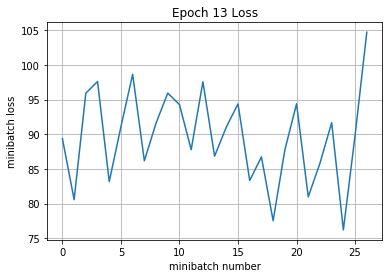

0.459737292975
Epoch 14, Overall loss = 1.38 and accuracy of 0.46


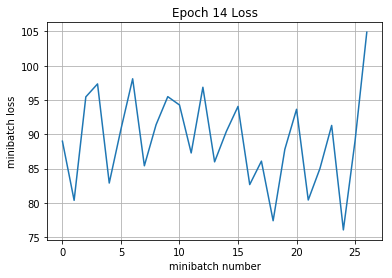

Iteration 400: with minibatch training loss = 1.32 and accuracy of 0.47
0.468874928612
Epoch 15, Overall loss = 1.37 and accuracy of 0.469


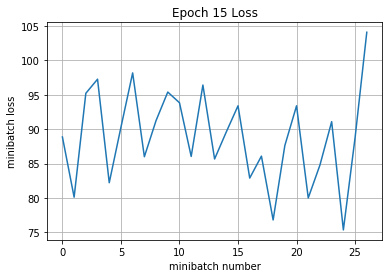

0.471730439749
Epoch 16, Overall loss = 1.36 and accuracy of 0.472


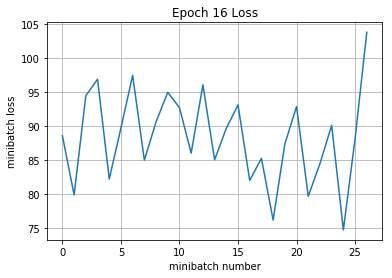

Iteration 450: with minibatch training loss = 1.18 and accuracy of 0.59
0.474014848658
Epoch 17, Overall loss = 1.36 and accuracy of 0.474


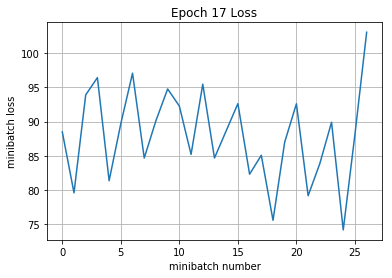

0.476299257567
Epoch 18, Overall loss = 1.35 and accuracy of 0.476


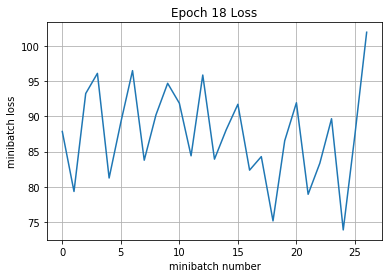

Iteration 500: with minibatch training loss = 1.37 and accuracy of 0.56
0.479725870931
Epoch 19, Overall loss = 1.34 and accuracy of 0.48


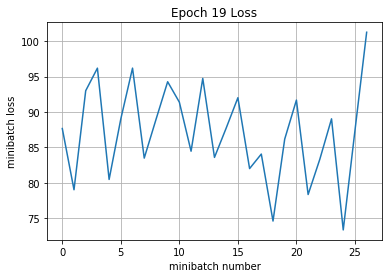

0.479725870931
Epoch 20, Overall loss = 1.34 and accuracy of 0.48


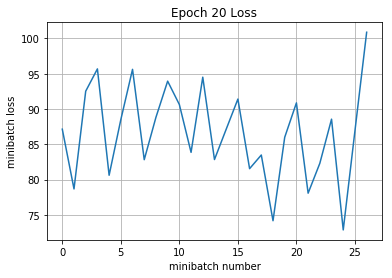

Iteration 550: with minibatch training loss = 1.42 and accuracy of 0.42
0.478012564249
Epoch 21, Overall loss = 1.33 and accuracy of 0.478


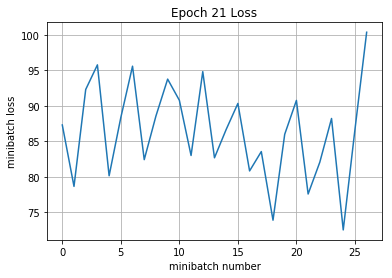

0.481439177613
Epoch 22, Overall loss = 1.33 and accuracy of 0.481


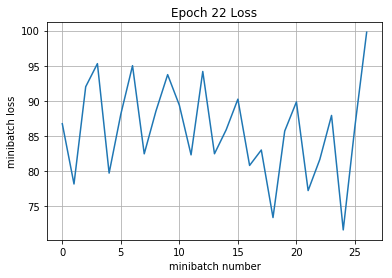

Iteration 600: with minibatch training loss = 1.49 and accuracy of 0.45
0.485436893204
Epoch 23, Overall loss = 1.32 and accuracy of 0.485


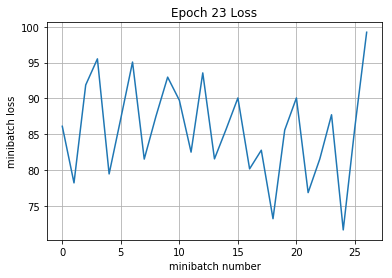

0.492290119931
Epoch 24, Overall loss = 1.31 and accuracy of 0.492


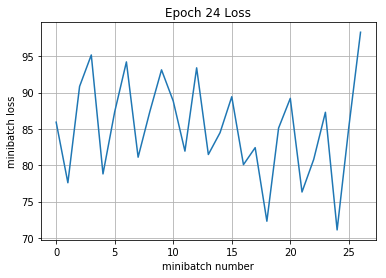

Iteration 650: with minibatch training loss = 1.42 and accuracy of 0.5
0.493432324386
Epoch 25, Overall loss = 1.31 and accuracy of 0.493


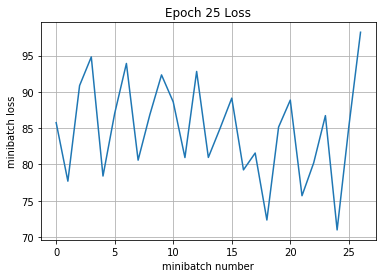

In [15]:
run_model(session, y_out, loss, X_train, y_train, 
          epochs=25, batch_size=64, print_every=50, training = train_step, plot_losses=True)

In [17]:
run_model(session, y_out, loss, X_val, y_val, 1, batch_size=5, print_every=20)

Iteration 0: with minibatch training loss = 4.35 and accuracy of 0
Iteration 20: with minibatch training loss = 2.61 and accuracy of 0
Iteration 40: with minibatch training loss = 1.97 and accuracy of 0.2
Iteration 60: with minibatch training loss = 3.32 and accuracy of 0.4
Iteration 80: with minibatch training loss = 1.89 and accuracy of 0.4
0.250580046404
Epoch 1, Overall loss = 2.21 and accuracy of 0.251


In [56]:
tf.reset_default_graph()

In [57]:
load_model('facenet/pre-trained/20170511-185253.pb')
X = tf.get_default_graph().get_tensor_by_name('input:0')
y = tf.placeholder(tf.int64, [None])
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
frozen_net_output = tf.get_default_graph().get_tensor_by_name('embeddings:0')



#dense1 = tf.layers.dense(frozen_net_output, 128, activation=tf.nn.relu)
y_out = tf.layers.dense(frozen_net_output, 7)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,7),logits=y_out))
optimizer = tf.train.AdamOptimizer(5e-4)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(loss)

In [58]:
session = tf.Session()

session.run(tf.global_variables_initializer())

Iteration 0: with minibatch training loss = 1.98 and accuracy of 0.19
0.112507138778
Epoch 1, Overall loss = 1.95 and accuracy of 0.113


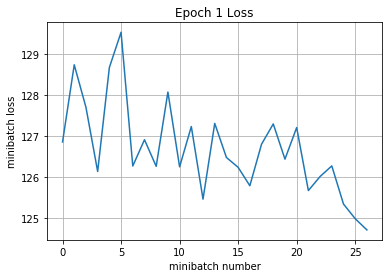

Iteration 50: with minibatch training loss = 1.95 and accuracy of 0.12
0.133066818961
Epoch 2, Overall loss = 1.91 and accuracy of 0.133


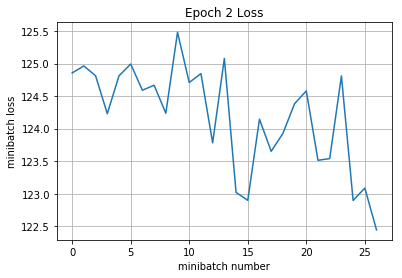

0.214163335237
Epoch 3, Overall loss = 1.89 and accuracy of 0.214


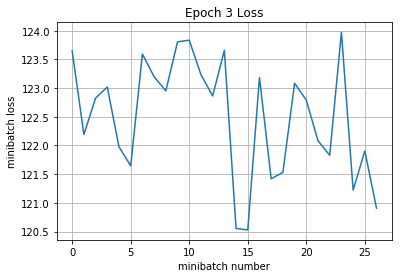

Iteration 100: with minibatch training loss = 1.91 and accuracy of 0.22
0.226727584238
Epoch 4, Overall loss = 1.87 and accuracy of 0.227


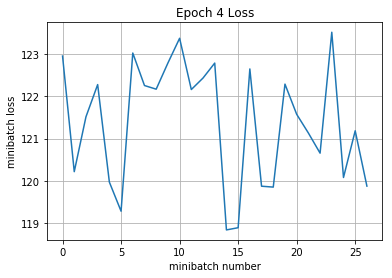

0.226727584238
Epoch 5, Overall loss = 1.86 and accuracy of 0.227


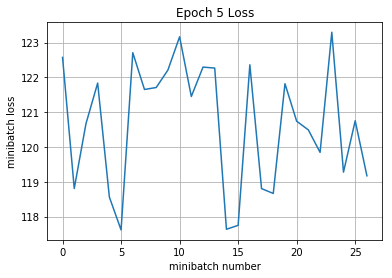

Iteration 150: with minibatch training loss = 1.83 and accuracy of 0.2
0.227869788692
Epoch 6, Overall loss = 1.85 and accuracy of 0.228


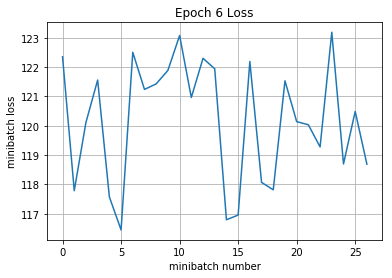

0.229011993147
Epoch 7, Overall loss = 1.85 and accuracy of 0.229


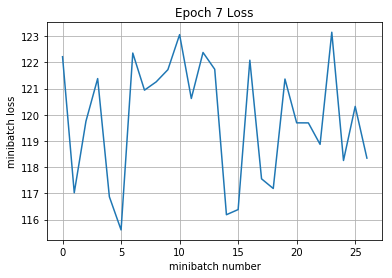

Iteration 200: with minibatch training loss = 1.88 and accuracy of 0.28
0.227298686465
Epoch 8, Overall loss = 1.84 and accuracy of 0.227


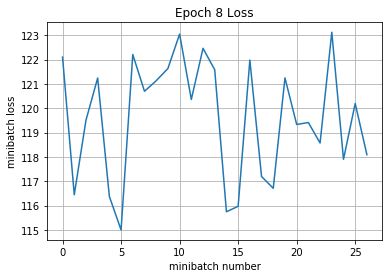

0.227298686465
Epoch 9, Overall loss = 1.84 and accuracy of 0.227


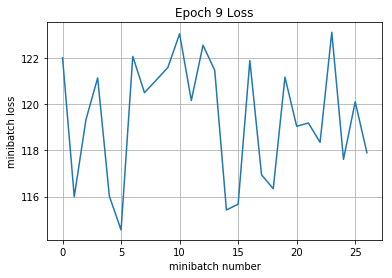

Iteration 250: with minibatch training loss = 1.88 and accuracy of 0.19
0.22615648201
Epoch 10, Overall loss = 1.84 and accuracy of 0.226


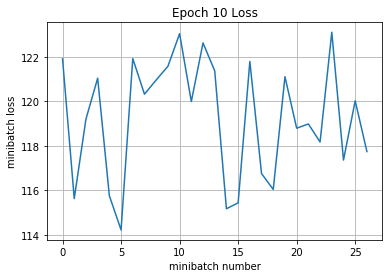

0.225014277556
Epoch 11, Overall loss = 1.84 and accuracy of 0.225


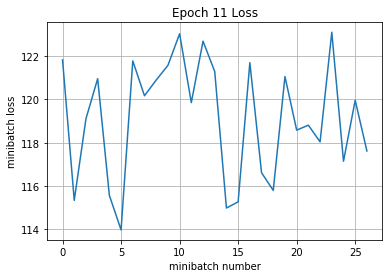

Iteration 300: with minibatch training loss = 1.89 and accuracy of 0.31
0.226727584238
Epoch 12, Overall loss = 1.84 and accuracy of 0.227


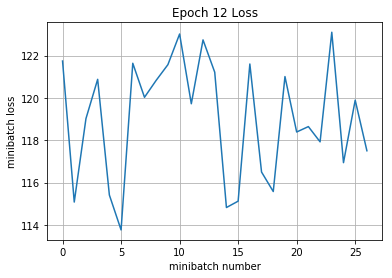

Iteration 350: with minibatch training loss = 1.83 and accuracy of 0.3
0.228440890919
Epoch 13, Overall loss = 1.83 and accuracy of 0.228


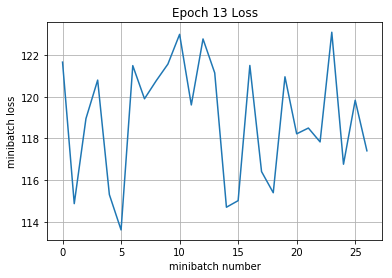

0.230154197601
Epoch 14, Overall loss = 1.83 and accuracy of 0.23


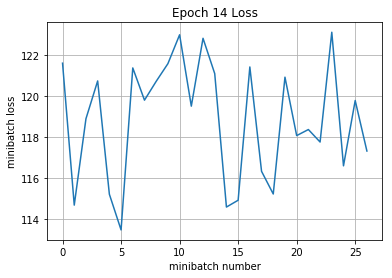

Iteration 400: with minibatch training loss = 1.84 and accuracy of 0.3
0.231296402056
Epoch 15, Overall loss = 1.83 and accuracy of 0.231


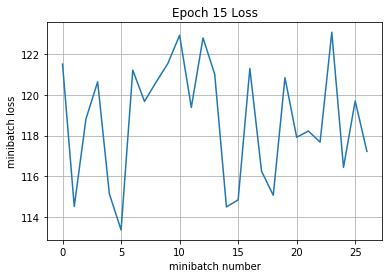

0.230154197601
Epoch 16, Overall loss = 1.83 and accuracy of 0.23


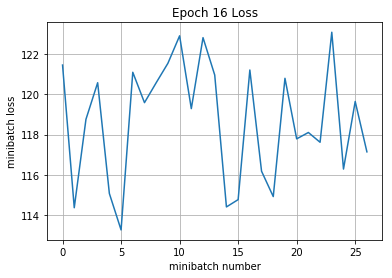

Iteration 450: with minibatch training loss = 1.79 and accuracy of 0.23
0.230725299829
Epoch 17, Overall loss = 1.83 and accuracy of 0.231


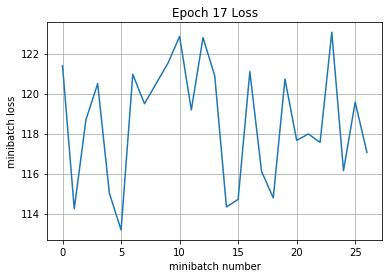

0.234151913192
Epoch 18, Overall loss = 1.83 and accuracy of 0.234


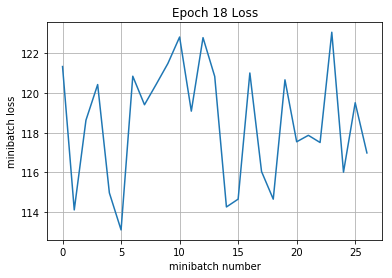

Iteration 500: with minibatch training loss = 1.78 and accuracy of 0.28
0.23472301542
Epoch 19, Overall loss = 1.83 and accuracy of 0.235


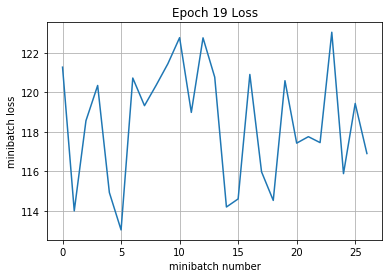

0.237578526556
Epoch 20, Overall loss = 1.83 and accuracy of 0.238


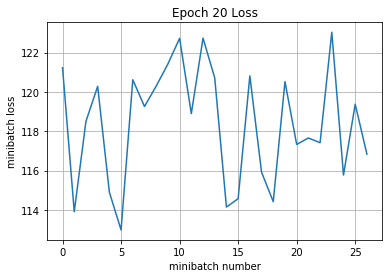

Iteration 550: with minibatch training loss = 1.92 and accuracy of 0.2
0.238720731011
Epoch 21, Overall loss = 1.82 and accuracy of 0.239


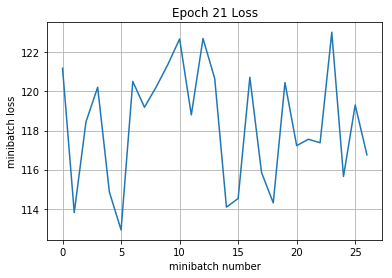

0.239291833238
Epoch 22, Overall loss = 1.82 and accuracy of 0.239


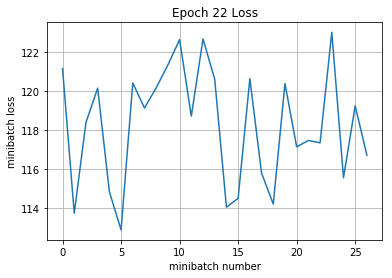

Iteration 600: with minibatch training loss = 1.88 and accuracy of 0.23
0.239862935465
Epoch 23, Overall loss = 1.82 and accuracy of 0.24


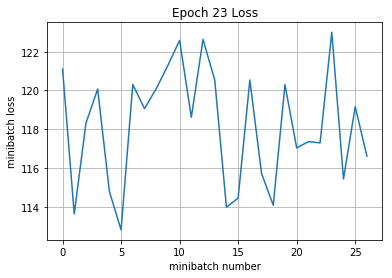

0.243289548829
Epoch 24, Overall loss = 1.82 and accuracy of 0.243


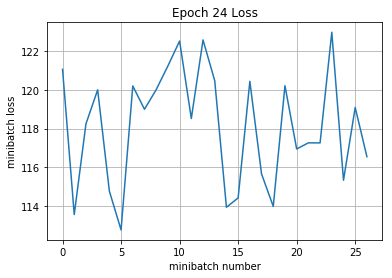

Iteration 650: with minibatch training loss = 1.85 and accuracy of 0.27
0.243289548829
Epoch 25, Overall loss = 1.82 and accuracy of 0.243


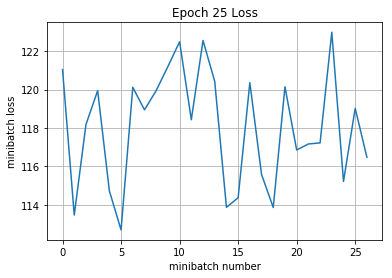

Iteration 700: with minibatch training loss = 1.86 and accuracy of 0.22
0.244431753284
Epoch 26, Overall loss = 1.82 and accuracy of 0.244


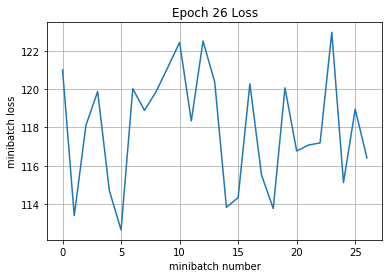

0.24728726442
Epoch 27, Overall loss = 1.82 and accuracy of 0.247


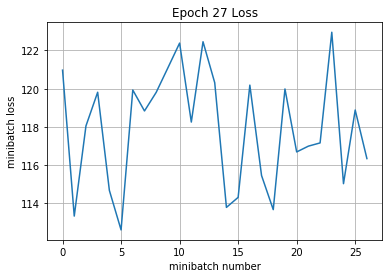

Iteration 750: with minibatch training loss = 1.83 and accuracy of 0.3
0.249000571102
Epoch 28, Overall loss = 1.82 and accuracy of 0.249


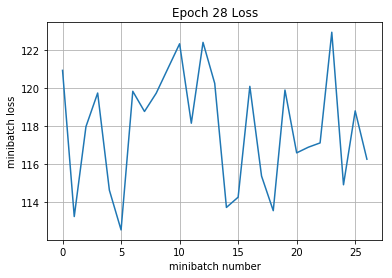

0.250142775557
Epoch 29, Overall loss = 1.82 and accuracy of 0.25


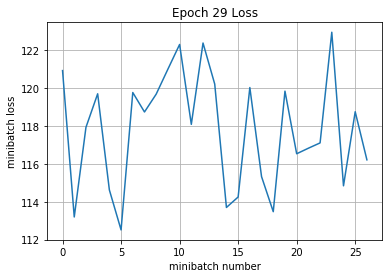

Iteration 800: with minibatch training loss = 1.8 and accuracy of 0.34
0.250142775557
Epoch 30, Overall loss = 1.82 and accuracy of 0.25


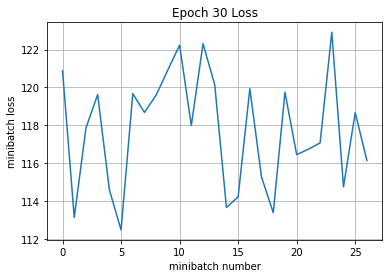

0.250713877784
Epoch 31, Overall loss = 1.81 and accuracy of 0.251


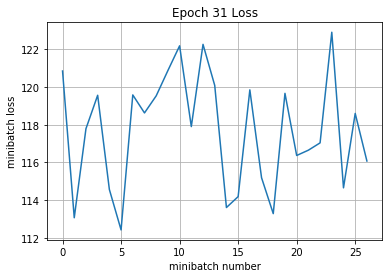

Iteration 850: with minibatch training loss = 1.88 and accuracy of 0.19
0.251856082239
Epoch 32, Overall loss = 1.81 and accuracy of 0.252


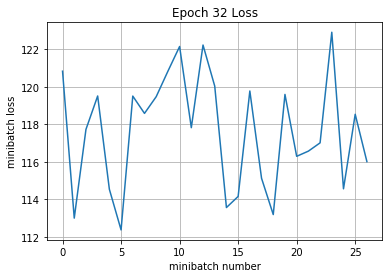

0.254711593375
Epoch 33, Overall loss = 1.81 and accuracy of 0.255


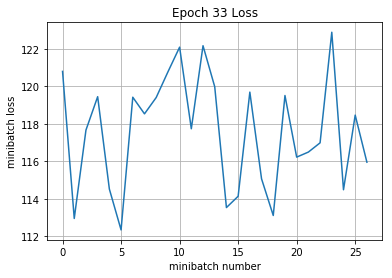

Iteration 900: with minibatch training loss = 1.89 and accuracy of 0.22
0.255282695603
Epoch 34, Overall loss = 1.81 and accuracy of 0.255


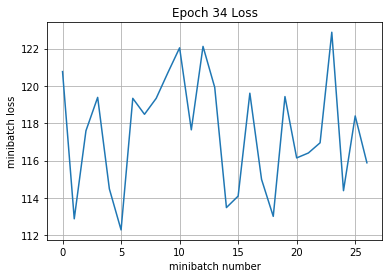

0.256996002284
Epoch 35, Overall loss = 1.81 and accuracy of 0.257


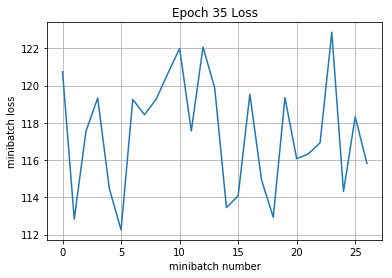

Iteration 950: with minibatch training loss = 1.75 and accuracy of 0.22
0.257567104512
Epoch 36, Overall loss = 1.81 and accuracy of 0.258


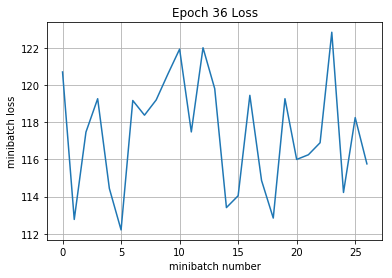

0.259280411194
Epoch 37, Overall loss = 1.81 and accuracy of 0.259


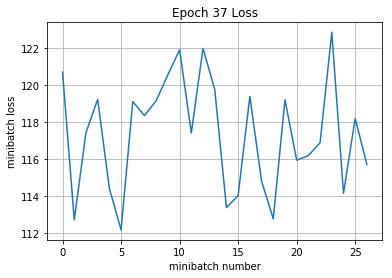

Iteration 1000: with minibatch training loss = 1.76 and accuracy of 0.28
0.259851513421
Epoch 38, Overall loss = 1.81 and accuracy of 0.26


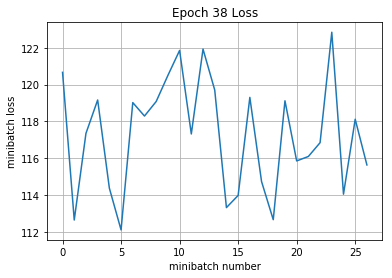

Iteration 1050: with minibatch training loss = 1.78 and accuracy of 0.33
0.260993717875
Epoch 39, Overall loss = 1.81 and accuracy of 0.261


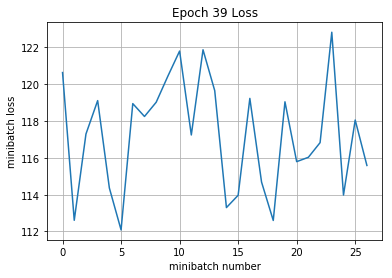

0.260993717875
Epoch 40, Overall loss = 1.81 and accuracy of 0.261


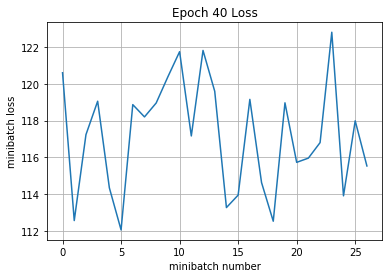

Iteration 1100: with minibatch training loss = 1.81 and accuracy of 0.2
0.260993717875
Epoch 41, Overall loss = 1.81 and accuracy of 0.261


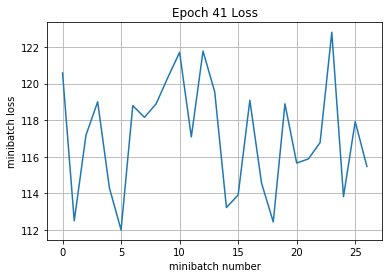

0.261564820103
Epoch 42, Overall loss = 1.81 and accuracy of 0.262


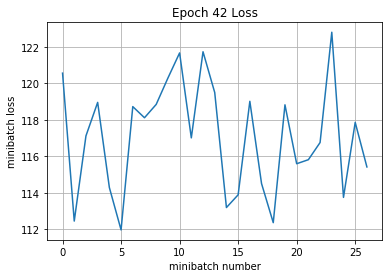

Iteration 1150: with minibatch training loss = 1.86 and accuracy of 0.25
0.26213592233
Epoch 43, Overall loss = 1.8 and accuracy of 0.262


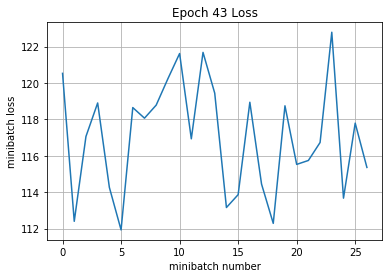

0.263849229012
Epoch 44, Overall loss = 1.8 and accuracy of 0.264


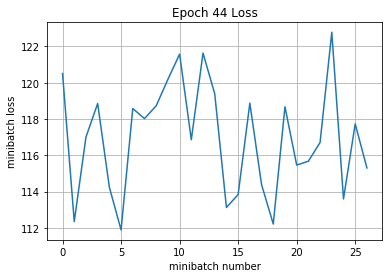

Iteration 1200: with minibatch training loss = 1.9 and accuracy of 0.22
0.262707024557
Epoch 45, Overall loss = 1.8 and accuracy of 0.263


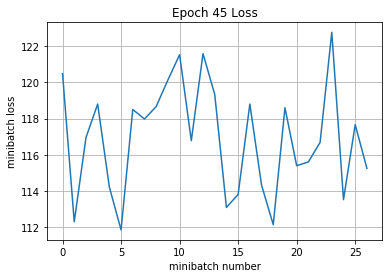

0.263278126785
Epoch 46, Overall loss = 1.8 and accuracy of 0.263


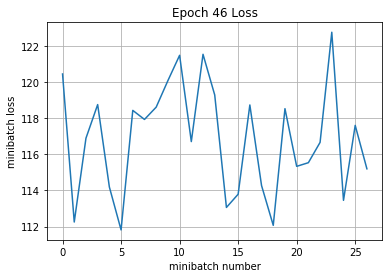

Iteration 1250: with minibatch training loss = 1.85 and accuracy of 0.34
0.263849229012
Epoch 47, Overall loss = 1.8 and accuracy of 0.264


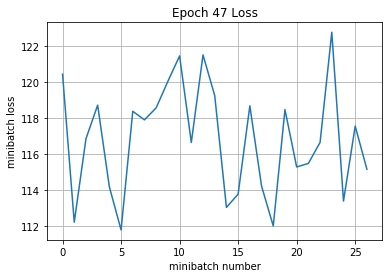

0.264420331239
Epoch 48, Overall loss = 1.8 and accuracy of 0.264


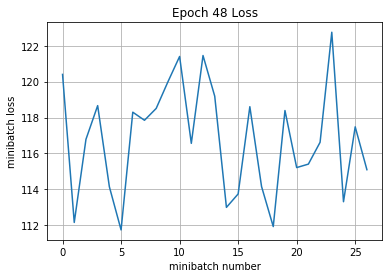

Iteration 1300: with minibatch training loss = 1.78 and accuracy of 0.31
0.266704740148
Epoch 49, Overall loss = 1.8 and accuracy of 0.267


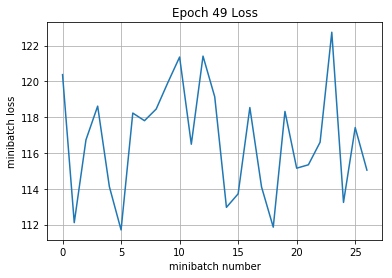

0.26841804683
Epoch 50, Overall loss = 1.8 and accuracy of 0.268


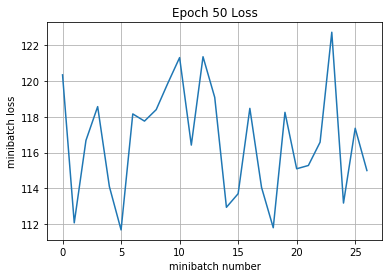

Iteration 1350: with minibatch training loss = 1.88 and accuracy of 0.16
0.269560251285
Epoch 51, Overall loss = 1.8 and accuracy of 0.27


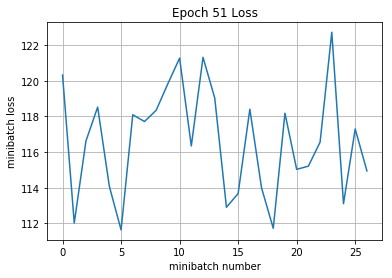

Iteration 1400: with minibatch training loss = 1.92 and accuracy of 0.2
0.26841804683
Epoch 52, Overall loss = 1.8 and accuracy of 0.268


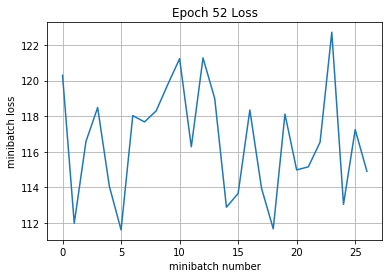

0.267846944603
Epoch 53, Overall loss = 1.8 and accuracy of 0.268


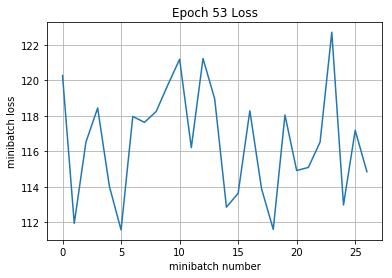

Iteration 1450: with minibatch training loss = 1.84 and accuracy of 0.27
0.266704740148
Epoch 54, Overall loss = 1.8 and accuracy of 0.267


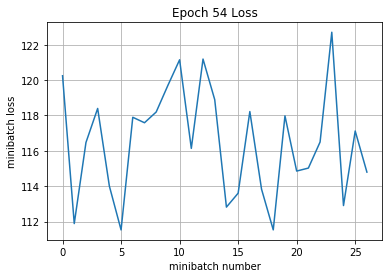

0.266133637921
Epoch 55, Overall loss = 1.8 and accuracy of 0.266


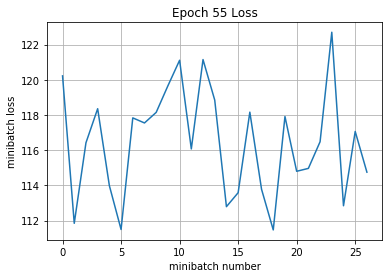

Iteration 1500: with minibatch training loss = 1.77 and accuracy of 0.31
0.266133637921
Epoch 56, Overall loss = 1.79 and accuracy of 0.266


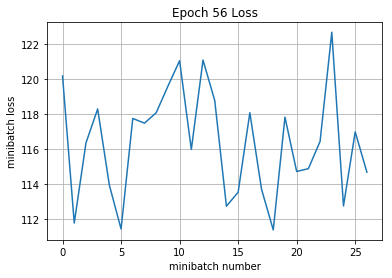

0.266704740148
Epoch 57, Overall loss = 1.79 and accuracy of 0.267


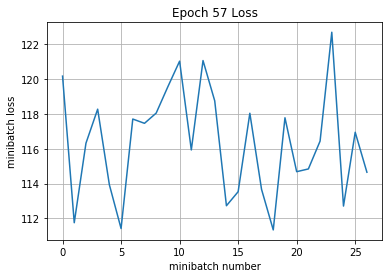

Iteration 1550: with minibatch training loss = 1.81 and accuracy of 0.3
0.266133637921
Epoch 58, Overall loss = 1.79 and accuracy of 0.266


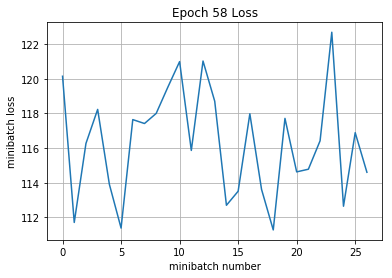

0.266133637921
Epoch 59, Overall loss = 1.79 and accuracy of 0.266


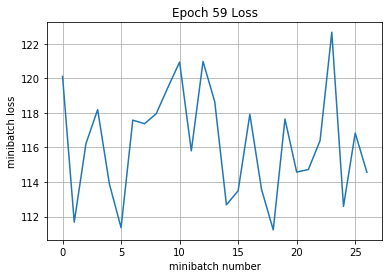

Iteration 1600: with minibatch training loss = 1.83 and accuracy of 0.14
0.266133637921
Epoch 60, Overall loss = 1.79 and accuracy of 0.266


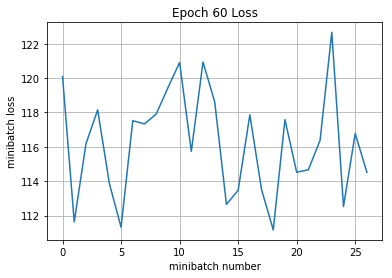

0.266704740148
Epoch 61, Overall loss = 1.79 and accuracy of 0.267


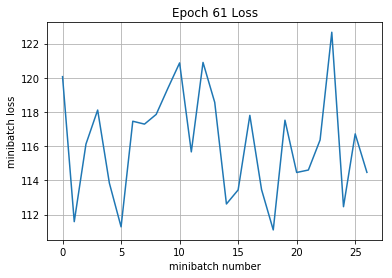

Iteration 1650: with minibatch training loss = 1.84 and accuracy of 0.36
0.267846944603
Epoch 62, Overall loss = 1.79 and accuracy of 0.268


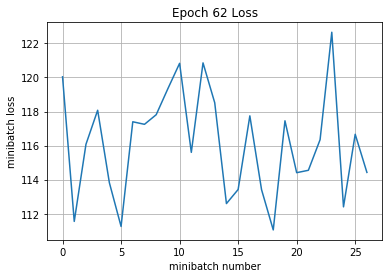

Iteration 1700: with minibatch training loss = 1.79 and accuracy of 0.27
0.268989149058
Epoch 63, Overall loss = 1.79 and accuracy of 0.269


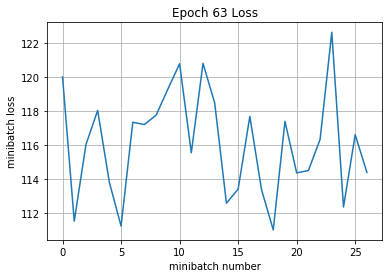

0.269560251285
Epoch 64, Overall loss = 1.79 and accuracy of 0.27


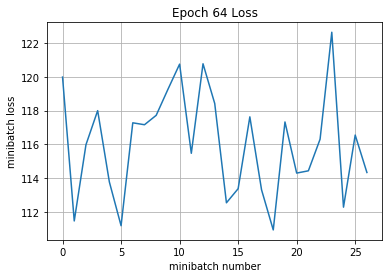

Iteration 1750: with minibatch training loss = 1.82 and accuracy of 0.3
0.272415762421
Epoch 65, Overall loss = 1.79 and accuracy of 0.272


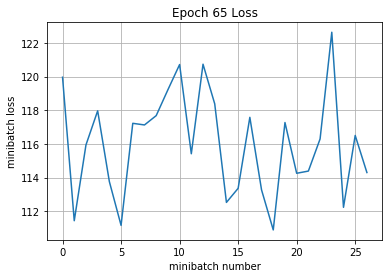

0.272415762421
Epoch 66, Overall loss = 1.79 and accuracy of 0.272


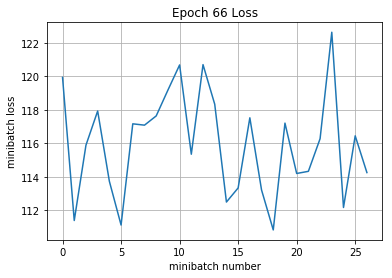

Iteration 1800: with minibatch training loss = 1.73 and accuracy of 0.31
0.272415762421
Epoch 67, Overall loss = 1.79 and accuracy of 0.272


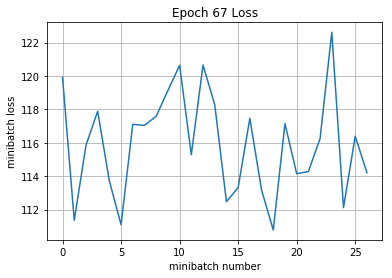

0.273557966876
Epoch 68, Overall loss = 1.79 and accuracy of 0.274


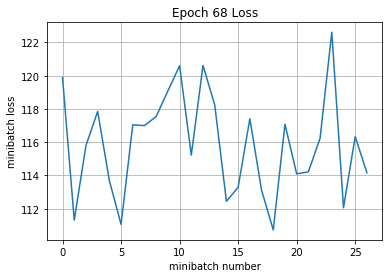

Iteration 1850: with minibatch training loss = 1.76 and accuracy of 0.31
0.273557966876
Epoch 69, Overall loss = 1.79 and accuracy of 0.274


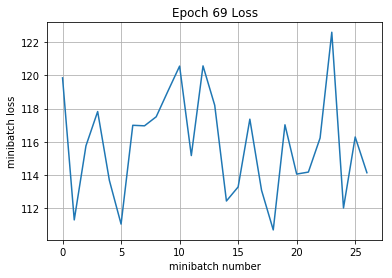

0.273557966876
Epoch 70, Overall loss = 1.79 and accuracy of 0.274


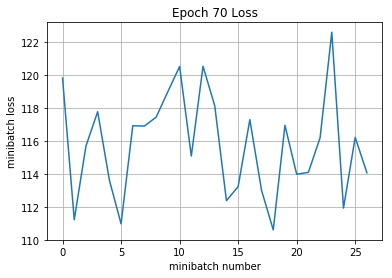

Iteration 1900: with minibatch training loss = 1.88 and accuracy of 0.23
0.272986864649
Epoch 71, Overall loss = 1.78 and accuracy of 0.273


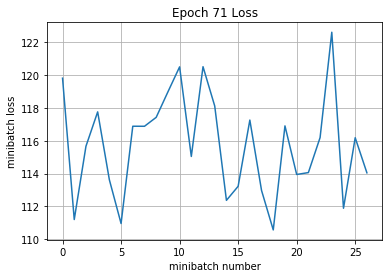

0.273557966876
Epoch 72, Overall loss = 1.78 and accuracy of 0.274


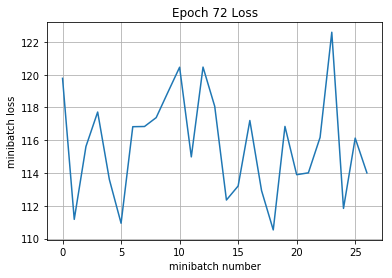

Iteration 1950: with minibatch training loss = 1.82 and accuracy of 0.25
0.274129069103
Epoch 73, Overall loss = 1.78 and accuracy of 0.274


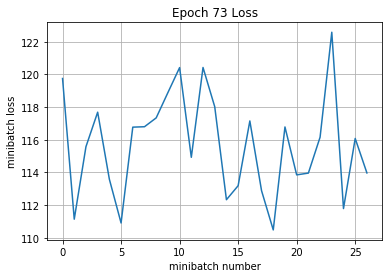

0.274700171331
Epoch 74, Overall loss = 1.78 and accuracy of 0.275


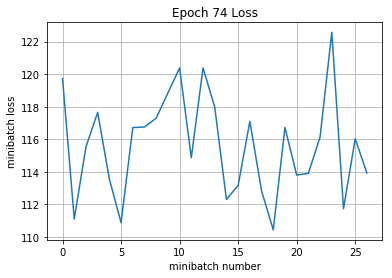

Iteration 2000: with minibatch training loss = 1.8 and accuracy of 0.28
0.274700171331
Epoch 75, Overall loss = 1.78 and accuracy of 0.275


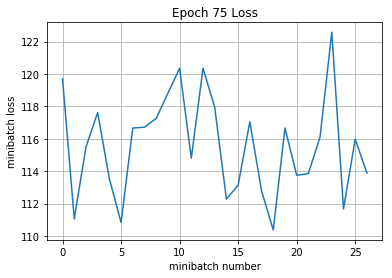

Iteration 2050: with minibatch training loss = 1.81 and accuracy of 0.27
0.275271273558
Epoch 76, Overall loss = 1.78 and accuracy of 0.275


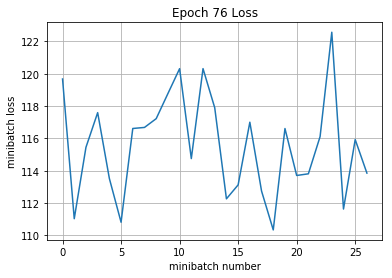

0.277555682467
Epoch 77, Overall loss = 1.78 and accuracy of 0.278


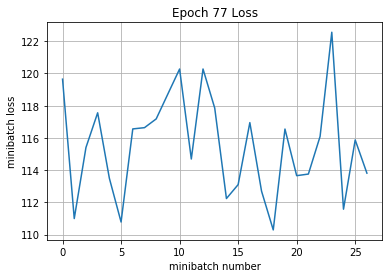

Iteration 2100: with minibatch training loss = 1.78 and accuracy of 0.3
0.277555682467
Epoch 78, Overall loss = 1.78 and accuracy of 0.278


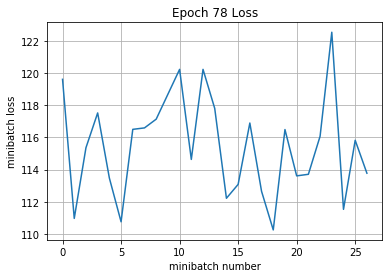

0.27698458024
Epoch 79, Overall loss = 1.78 and accuracy of 0.277


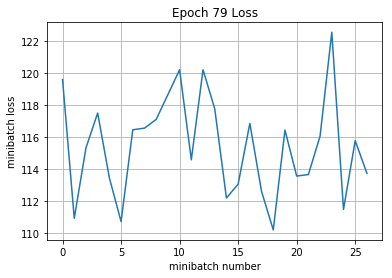

Iteration 2150: with minibatch training loss = 1.76 and accuracy of 0.38
0.277555682467
Epoch 80, Overall loss = 1.78 and accuracy of 0.278


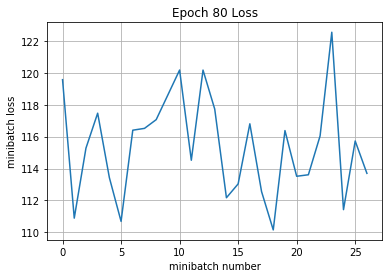

0.278697886922
Epoch 81, Overall loss = 1.78 and accuracy of 0.279


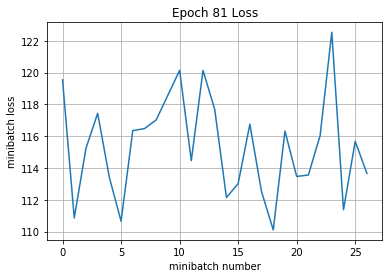

Iteration 2200: with minibatch training loss = 1.84 and accuracy of 0.22
0.279268989149
Epoch 82, Overall loss = 1.78 and accuracy of 0.279


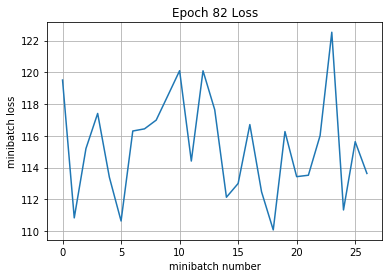

0.279268989149
Epoch 83, Overall loss = 1.78 and accuracy of 0.279


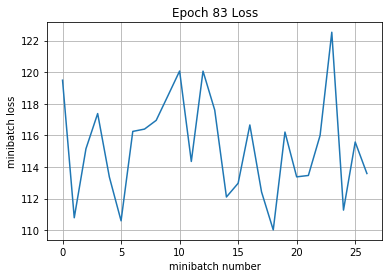

Iteration 2250: with minibatch training loss = 1.85 and accuracy of 0.23
0.279268989149
Epoch 84, Overall loss = 1.78 and accuracy of 0.279


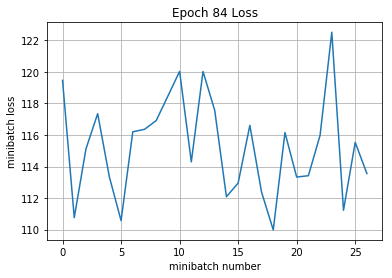

0.278697886922
Epoch 85, Overall loss = 1.78 and accuracy of 0.279


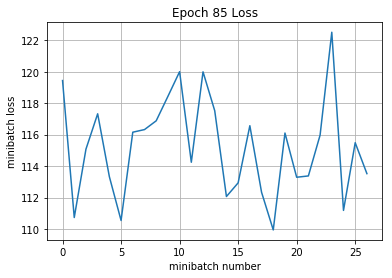

Iteration 2300: with minibatch training loss = 1.73 and accuracy of 0.25
0.279268989149
Epoch 86, Overall loss = 1.78 and accuracy of 0.279


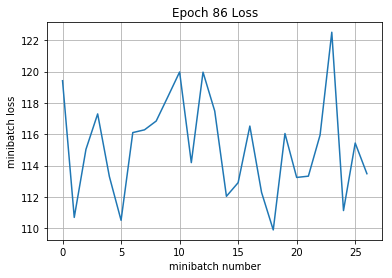

0.279268989149
Epoch 87, Overall loss = 1.78 and accuracy of 0.279


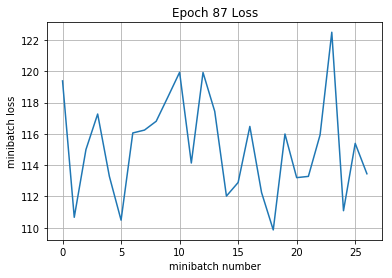

Iteration 2350: with minibatch training loss = 1.73 and accuracy of 0.39
0.279840091376
Epoch 88, Overall loss = 1.78 and accuracy of 0.28


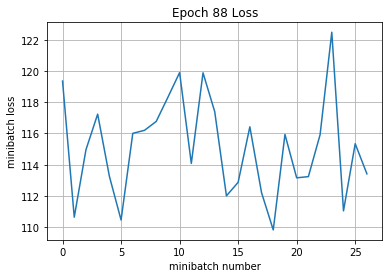

Iteration 2400: with minibatch training loss = 1.73 and accuracy of 0.3
0.280411193604
Epoch 89, Overall loss = 1.77 and accuracy of 0.28


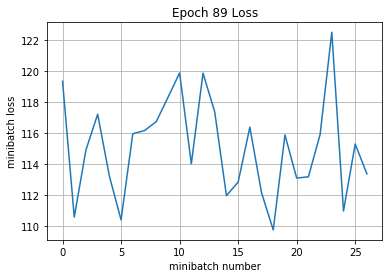

0.281553398058
Epoch 90, Overall loss = 1.77 and accuracy of 0.282


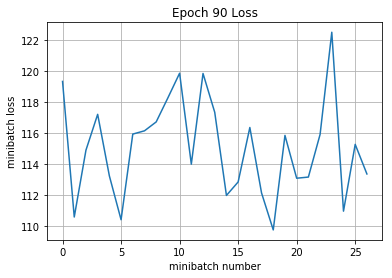

Iteration 2450: with minibatch training loss = 1.77 and accuracy of 0.3
0.282695602513
Epoch 91, Overall loss = 1.77 and accuracy of 0.283


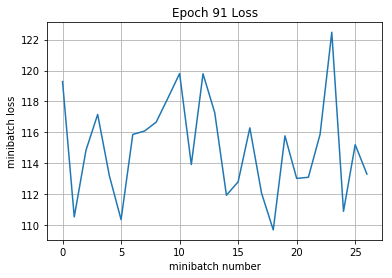

0.282695602513
Epoch 92, Overall loss = 1.77 and accuracy of 0.283


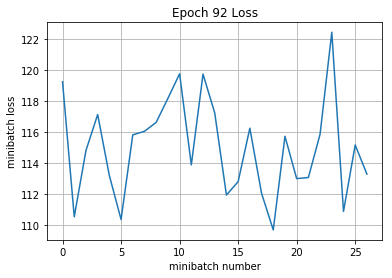

Iteration 2500: with minibatch training loss = 1.82 and accuracy of 0.27
0.282695602513
Epoch 93, Overall loss = 1.77 and accuracy of 0.283


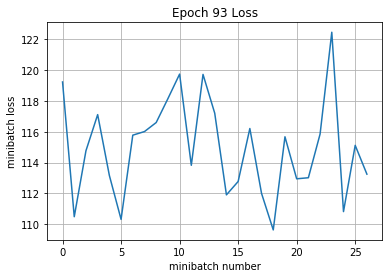

0.28326670474
Epoch 94, Overall loss = 1.77 and accuracy of 0.283


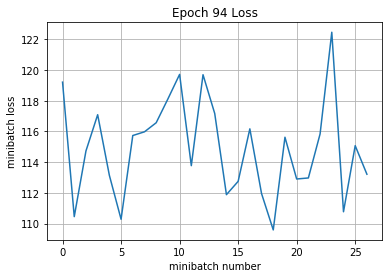

Iteration 2550: with minibatch training loss = 1.87 and accuracy of 0.23
0.28326670474
Epoch 95, Overall loss = 1.77 and accuracy of 0.283


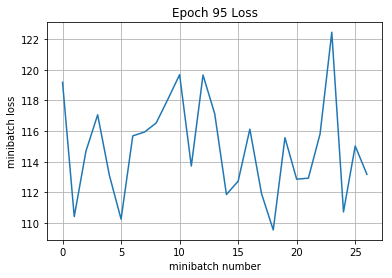

0.28326670474
Epoch 96, Overall loss = 1.77 and accuracy of 0.283


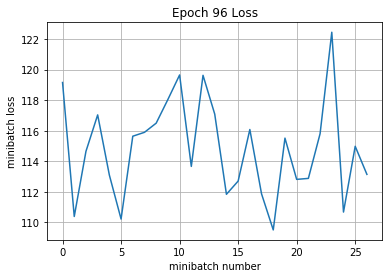

Iteration 2600: with minibatch training loss = 1.82 and accuracy of 0.36
0.282695602513
Epoch 97, Overall loss = 1.77 and accuracy of 0.283


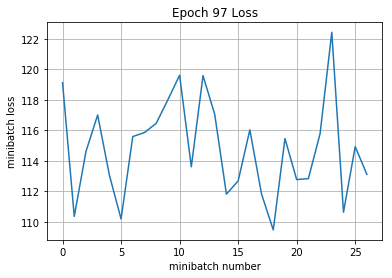

0.282124500286
Epoch 98, Overall loss = 1.77 and accuracy of 0.282


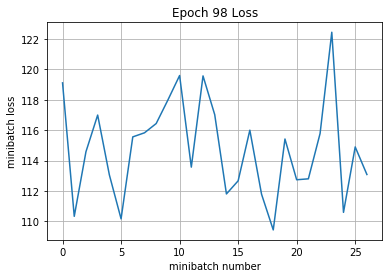

Iteration 2650: with minibatch training loss = 1.77 and accuracy of 0.27
0.282124500286
Epoch 99, Overall loss = 1.77 and accuracy of 0.282


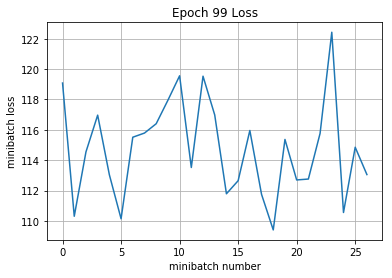

0.28326670474
Epoch 100, Overall loss = 1.77 and accuracy of 0.283


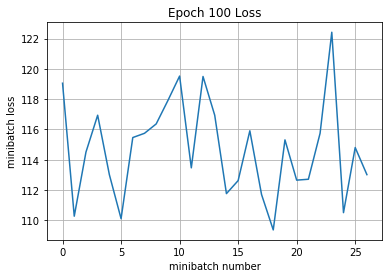

In [59]:
run_model(session, y_out, loss, X_train, y_train, 
          epochs=100, batch_size=64, print_every=50, training = train_step, plot_losses=True)

In [60]:
run_model(session, y_out, loss, X_val, y_val, 1, batch_size=5, print_every=20)

Iteration 0: with minibatch training loss = 2.28 and accuracy of 0
Iteration 20: with minibatch training loss = 1.72 and accuracy of 0.2
Iteration 40: with minibatch training loss = 1.84 and accuracy of 0.4
Iteration 60: with minibatch training loss = 1.67 and accuracy of 0.4
Iteration 80: with minibatch training loss = 1.86 and accuracy of 0.2
0.190255220418
Epoch 1, Overall loss = 1.9 and accuracy of 0.19


In [2]:
X_t10_features = np.load('data/SFEW_2/Train/train10_features.npy')
X_t2_features = np.load('data/SFEW_2/Train/train2_features.npy')
X_val_features = np.load('data/SFEW_2/Val/val_features.npy')

y_t10 = np.load('data/SFEW_2/Train/train_aug10_labels.npy')
y_t2 = np.load('data/SFEW_2/Train/train_aug2_labels.npy')
y_val = np.load('data/SFEW_2/Val/val_labels.npy')

X_t2_features = X_t2_features[:,-128:]

print X_t2_features.shape
print X_t10_features.shape
print X_val_features.shape
print y_t2.shape
print y_t10.shape
print y_val.shape

(1751, 128)
(9801, 2048)
(431, 2048)
(1751,)
(9801,)
(431,)


In [11]:
tf.reset_default_graph()

In [12]:
X = tf.placeholder(tf.float32, [None, 128])#2048])
y = tf.placeholder(tf.int64, [None])

#dense1 = tf.layers.dense(X, 512, activation=tf.nn.relu)
y_out = tf.layers.dense(X, 7)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,7),logits=y_out))
optimizer = tf.train.AdamOptimizer(5e-4)

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(loss)
    
session = tf.Session()

session.run(tf.global_variables_initializer())

Iteration 0: with minibatch training loss = 1.96 and accuracy of 0.19
0.218161050828
Epoch 1, Overall loss = 1.91 and accuracy of 0.218


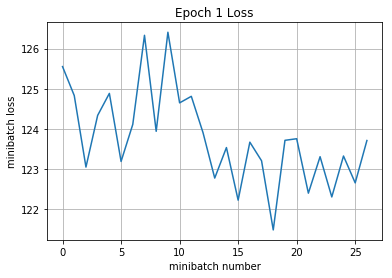

Iteration 50: with minibatch training loss = 1.87 and accuracy of 0.23
0.21987435751
Epoch 2, Overall loss = 1.88 and accuracy of 0.22


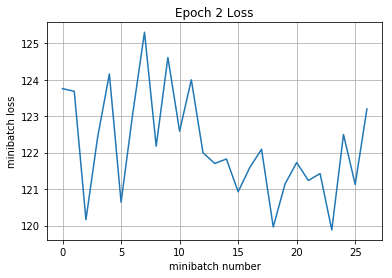

0.222158766419
Epoch 3, Overall loss = 1.87 and accuracy of 0.222


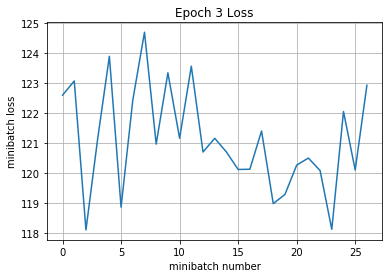

Iteration 100: with minibatch training loss = 1.84 and accuracy of 0.23
0.222729868646
Epoch 4, Overall loss = 1.86 and accuracy of 0.223


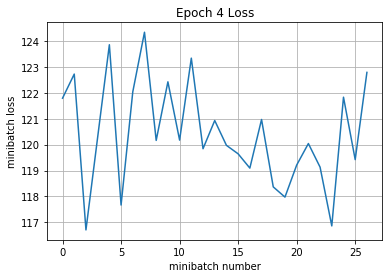

0.225014277556
Epoch 5, Overall loss = 1.85 and accuracy of 0.225


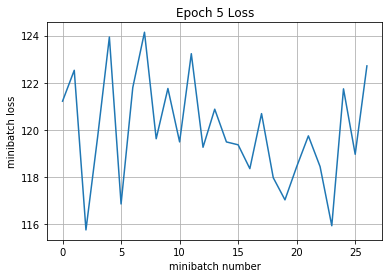

Iteration 150: with minibatch training loss = 1.86 and accuracy of 0.33
0.225014277556
Epoch 6, Overall loss = 1.85 and accuracy of 0.225


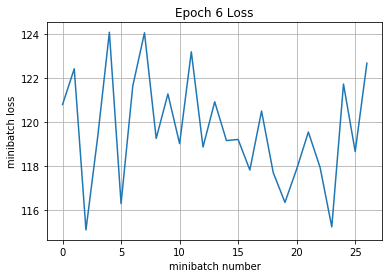

0.224443175328
Epoch 7, Overall loss = 1.84 and accuracy of 0.224


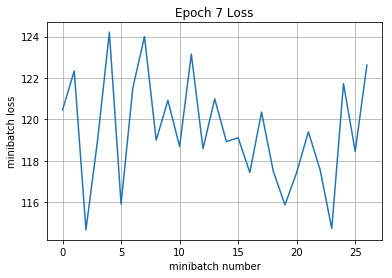

Iteration 200: with minibatch training loss = 1.92 and accuracy of 0.2
0.223872073101
Epoch 8, Overall loss = 1.84 and accuracy of 0.224


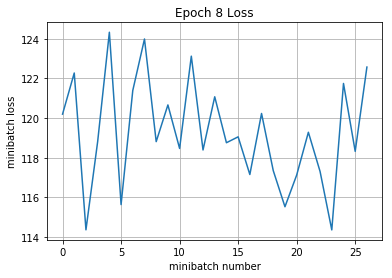

0.225014277556
Epoch 9, Overall loss = 1.84 and accuracy of 0.225


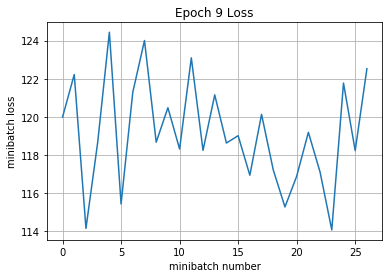

Iteration 250: with minibatch training loss = 1.94 and accuracy of 0.11
0.228440890919
Epoch 10, Overall loss = 1.84 and accuracy of 0.228


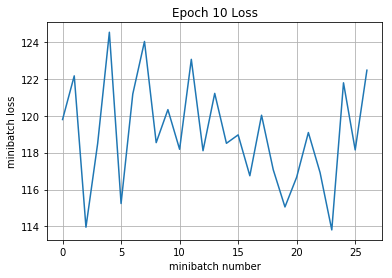

0.228440890919
Epoch 11, Overall loss = 1.83 and accuracy of 0.228


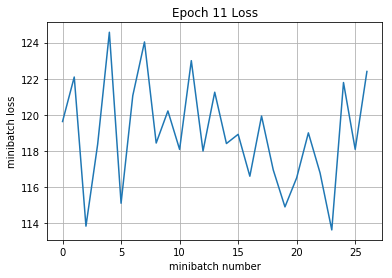

Iteration 300: with minibatch training loss = 1.85 and accuracy of 0.23
0.233580810965
Epoch 12, Overall loss = 1.83 and accuracy of 0.234


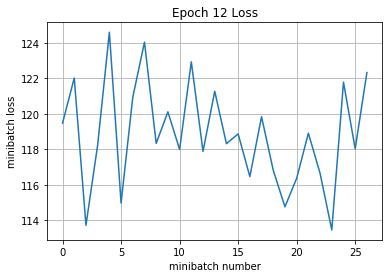

Iteration 350: with minibatch training loss = 1.91 and accuracy of 0.17
0.235294117647
Epoch 13, Overall loss = 1.83 and accuracy of 0.235


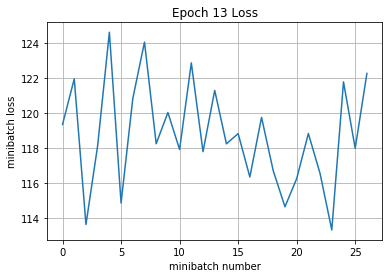

0.238149628784
Epoch 14, Overall loss = 1.83 and accuracy of 0.238


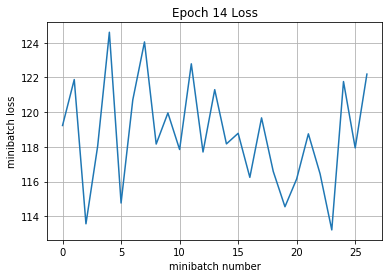

Iteration 400: with minibatch training loss = 1.82 and accuracy of 0.19
0.242147344375
Epoch 15, Overall loss = 1.83 and accuracy of 0.242


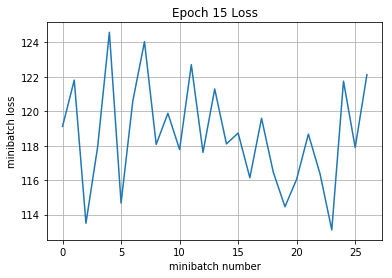

0.243289548829
Epoch 16, Overall loss = 1.83 and accuracy of 0.243


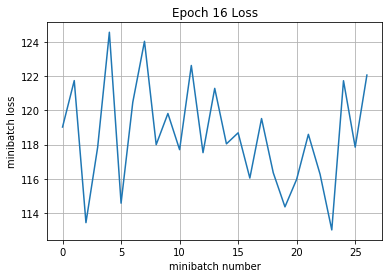

Iteration 450: with minibatch training loss = 1.82 and accuracy of 0.38
0.243860651057
Epoch 17, Overall loss = 1.83 and accuracy of 0.244


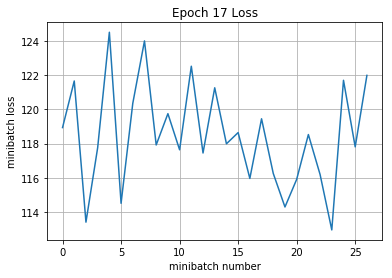

0.243860651057
Epoch 18, Overall loss = 1.83 and accuracy of 0.244


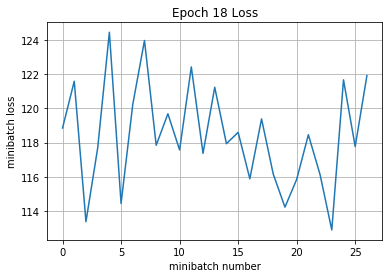

Iteration 500: with minibatch training loss = 1.84 and accuracy of 0.14
0.243860651057
Epoch 19, Overall loss = 1.83 and accuracy of 0.244


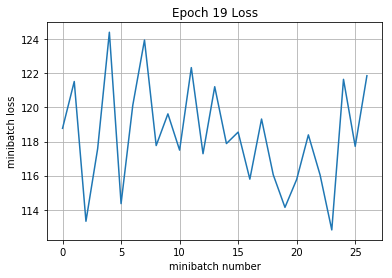

0.246716162193
Epoch 20, Overall loss = 1.82 and accuracy of 0.247


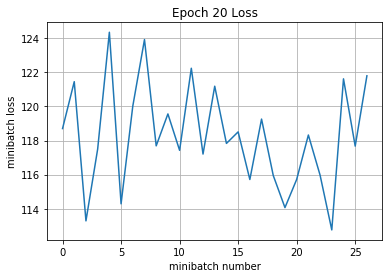

Iteration 550: with minibatch training loss = 1.83 and accuracy of 0.3
0.247858366648
Epoch 21, Overall loss = 1.82 and accuracy of 0.248


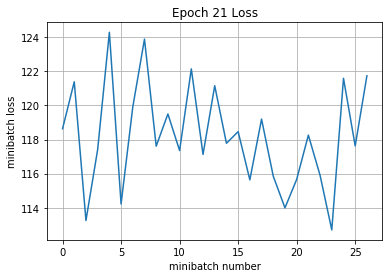

0.24957167333
Epoch 22, Overall loss = 1.82 and accuracy of 0.25


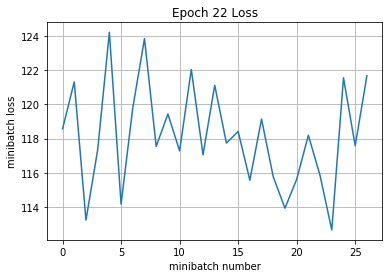

Iteration 600: with minibatch training loss = 1.87 and accuracy of 0.27
0.250142775557
Epoch 23, Overall loss = 1.82 and accuracy of 0.25


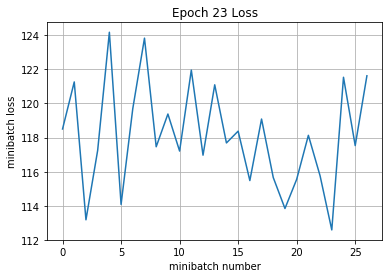

0.251284980011
Epoch 24, Overall loss = 1.82 and accuracy of 0.251


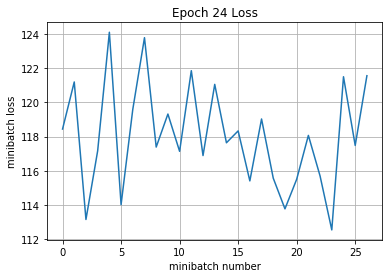

Iteration 650: with minibatch training loss = 1.77 and accuracy of 0.36
0.251856082239
Epoch 25, Overall loss = 1.82 and accuracy of 0.252


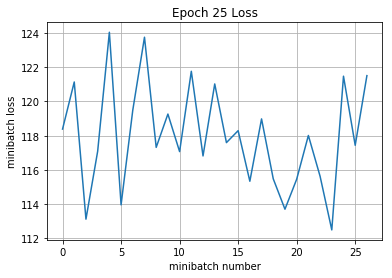

Iteration 700: with minibatch training loss = 1.83 and accuracy of 0.27
0.25585379783
Epoch 26, Overall loss = 1.82 and accuracy of 0.256


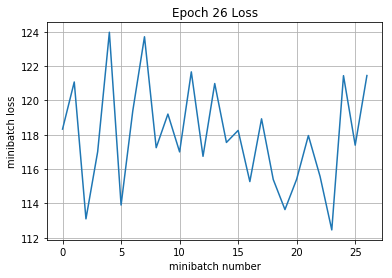

0.25585379783
Epoch 27, Overall loss = 1.82 and accuracy of 0.256


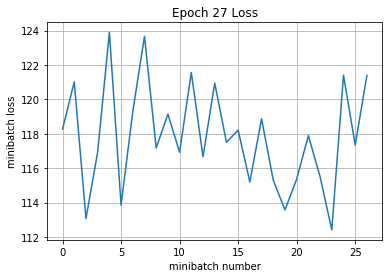

Iteration 750: with minibatch training loss = 1.84 and accuracy of 0.23
0.255282695603
Epoch 28, Overall loss = 1.82 and accuracy of 0.255


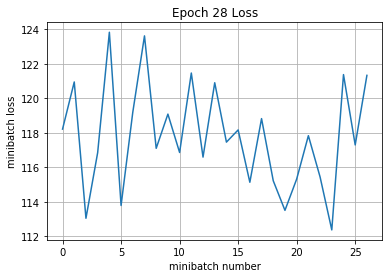

0.253569388921
Epoch 29, Overall loss = 1.82 and accuracy of 0.254


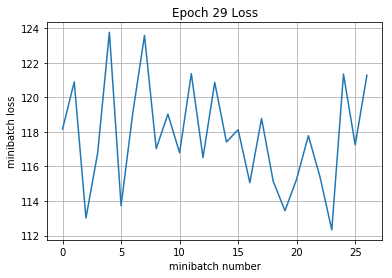

Iteration 800: with minibatch training loss = 1.86 and accuracy of 0.28
0.254140491148
Epoch 30, Overall loss = 1.81 and accuracy of 0.254


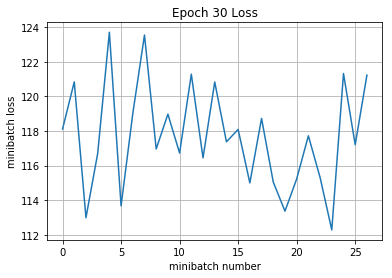

0.256996002284
Epoch 31, Overall loss = 1.81 and accuracy of 0.257


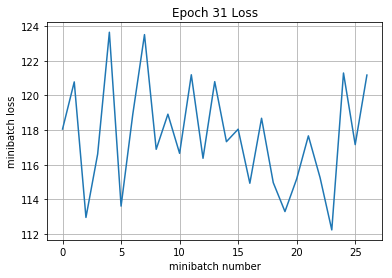

Iteration 850: with minibatch training loss = 1.89 and accuracy of 0.3
0.256996002284
Epoch 32, Overall loss = 1.81 and accuracy of 0.257


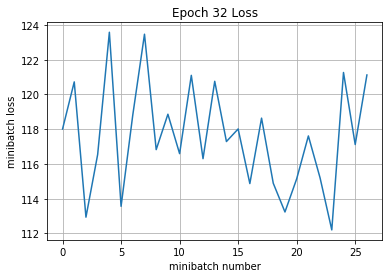

0.257567104512
Epoch 33, Overall loss = 1.81 and accuracy of 0.258


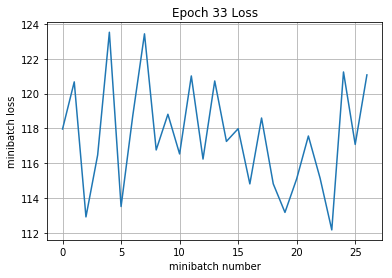

Iteration 900: with minibatch training loss = 1.86 and accuracy of 0.23
0.260422615648
Epoch 34, Overall loss = 1.81 and accuracy of 0.26


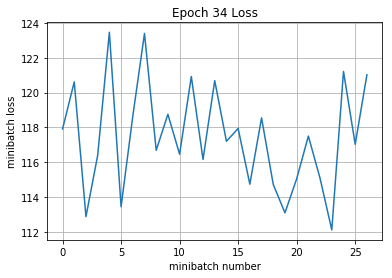

0.259851513421
Epoch 35, Overall loss = 1.81 and accuracy of 0.26


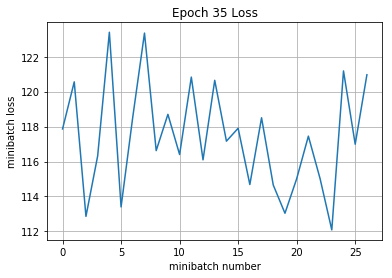

Iteration 950: with minibatch training loss = 1.77 and accuracy of 0.27
0.259280411194
Epoch 36, Overall loss = 1.81 and accuracy of 0.259


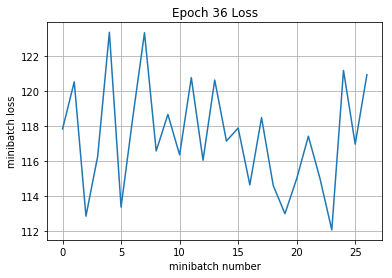

0.259280411194
Epoch 37, Overall loss = 1.81 and accuracy of 0.259


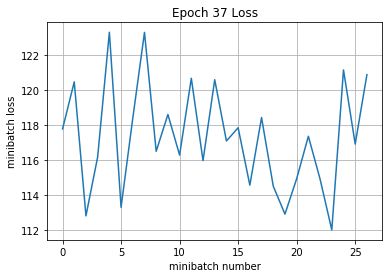

Iteration 1000: with minibatch training loss = 1.88 and accuracy of 0.23
0.259851513421
Epoch 38, Overall loss = 1.81 and accuracy of 0.26


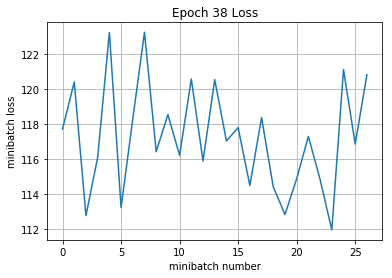

Iteration 1050: with minibatch training loss = 1.89 and accuracy of 0.2
0.259280411194
Epoch 39, Overall loss = 1.81 and accuracy of 0.259


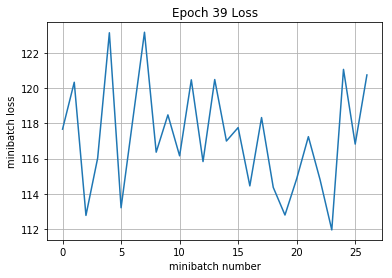

0.260993717875
Epoch 40, Overall loss = 1.81 and accuracy of 0.261


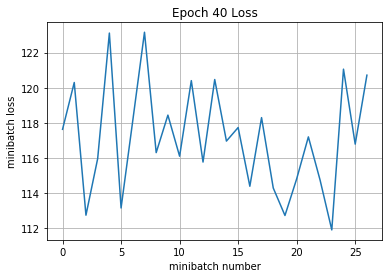

Iteration 1100: with minibatch training loss = 1.79 and accuracy of 0.25
0.260422615648
Epoch 41, Overall loss = 1.81 and accuracy of 0.26


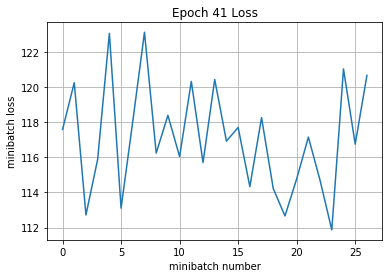

0.260422615648
Epoch 42, Overall loss = 1.8 and accuracy of 0.26


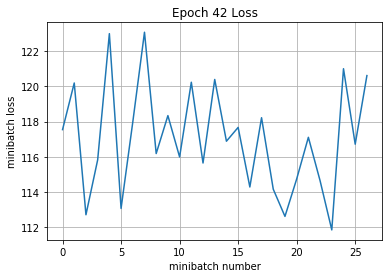

Iteration 1150: with minibatch training loss = 1.78 and accuracy of 0.33
0.258709308966
Epoch 43, Overall loss = 1.8 and accuracy of 0.259


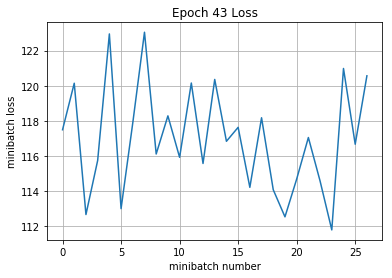

0.257567104512
Epoch 44, Overall loss = 1.8 and accuracy of 0.258


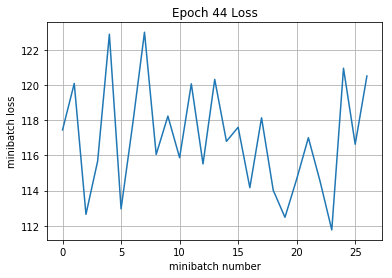

Iteration 1200: with minibatch training loss = 1.8 and accuracy of 0.31
0.258709308966
Epoch 45, Overall loss = 1.8 and accuracy of 0.259


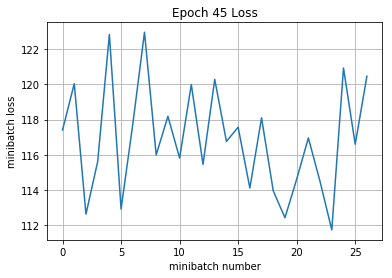

0.259280411194
Epoch 46, Overall loss = 1.8 and accuracy of 0.259


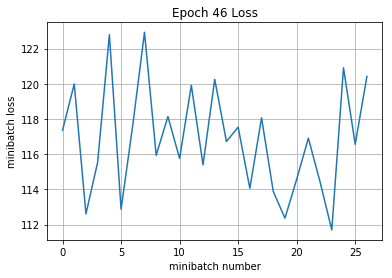

Iteration 1250: with minibatch training loss = 1.81 and accuracy of 0.23
0.259851513421
Epoch 47, Overall loss = 1.8 and accuracy of 0.26


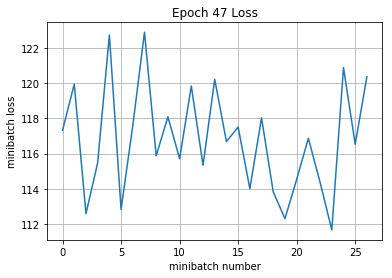

0.260993717875
Epoch 48, Overall loss = 1.8 and accuracy of 0.261


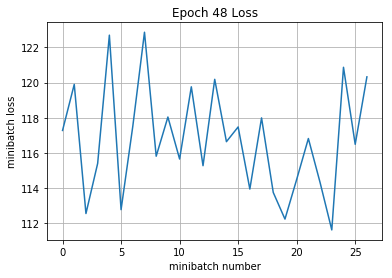

Iteration 1300: with minibatch training loss = 1.92 and accuracy of 0.23
0.263278126785
Epoch 49, Overall loss = 1.8 and accuracy of 0.263


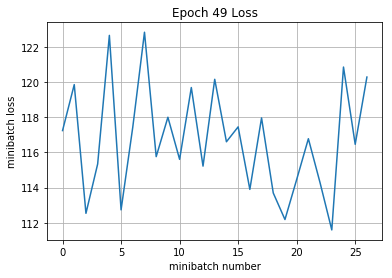

0.263278126785
Epoch 50, Overall loss = 1.8 and accuracy of 0.263


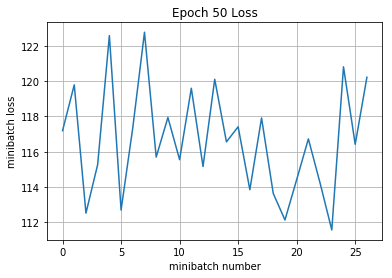

Iteration 1350: with minibatch training loss = 1.83 and accuracy of 0.27
0.26213592233
Epoch 51, Overall loss = 1.8 and accuracy of 0.262


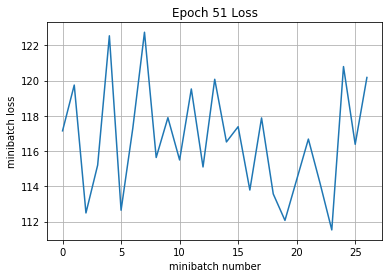

Iteration 1400: with minibatch training loss = 1.74 and accuracy of 0.28
0.260422615648
Epoch 52, Overall loss = 1.8 and accuracy of 0.26


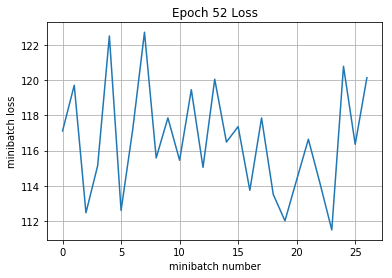

0.261564820103
Epoch 53, Overall loss = 1.8 and accuracy of 0.262


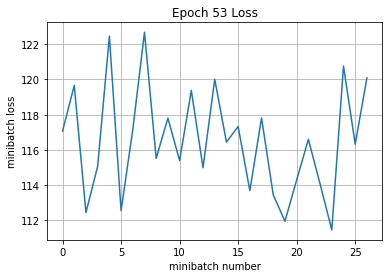

Iteration 1450: with minibatch training loss = 1.75 and accuracy of 0.28
0.262707024557
Epoch 54, Overall loss = 1.8 and accuracy of 0.263


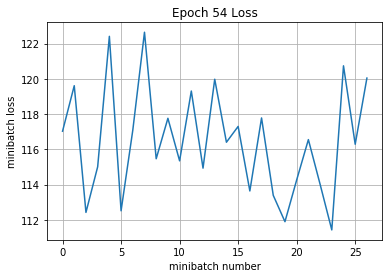

0.263278126785
Epoch 55, Overall loss = 1.8 and accuracy of 0.263


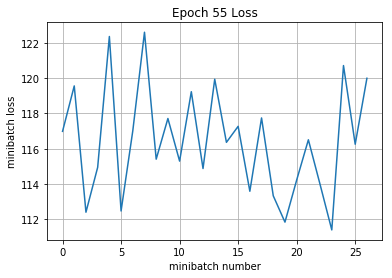

Iteration 1500: with minibatch training loss = 1.83 and accuracy of 0.31
0.264420331239
Epoch 56, Overall loss = 1.79 and accuracy of 0.264


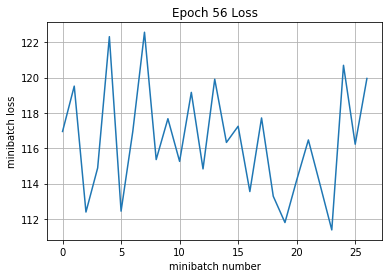

0.265562535694
Epoch 57, Overall loss = 1.79 and accuracy of 0.266


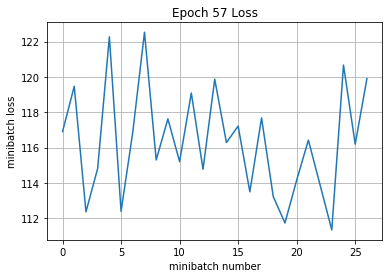

Iteration 1550: with minibatch training loss = 1.86 and accuracy of 0.25
0.265562535694
Epoch 58, Overall loss = 1.79 and accuracy of 0.266


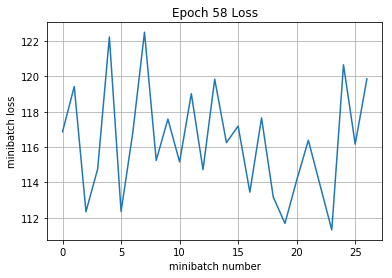

0.266704740148
Epoch 59, Overall loss = 1.79 and accuracy of 0.267


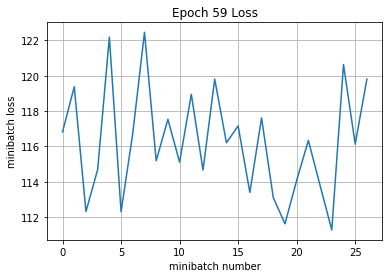

Iteration 1600: with minibatch training loss = 1.91 and accuracy of 0.23
0.266704740148
Epoch 60, Overall loss = 1.79 and accuracy of 0.267


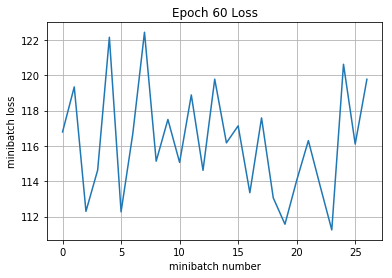

0.266704740148
Epoch 61, Overall loss = 1.79 and accuracy of 0.267


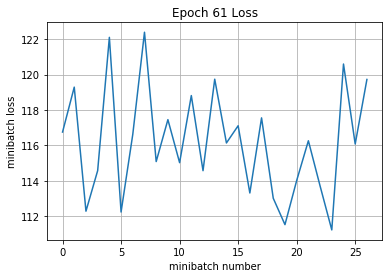

Iteration 1650: with minibatch training loss = 1.79 and accuracy of 0.33
0.265562535694
Epoch 62, Overall loss = 1.79 and accuracy of 0.266


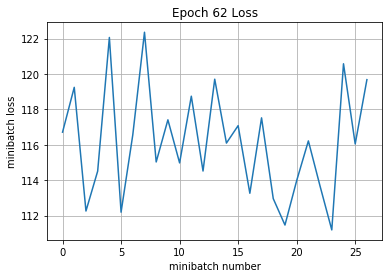

Iteration 1700: with minibatch training loss = 1.87 and accuracy of 0.19
0.266133637921
Epoch 63, Overall loss = 1.79 and accuracy of 0.266


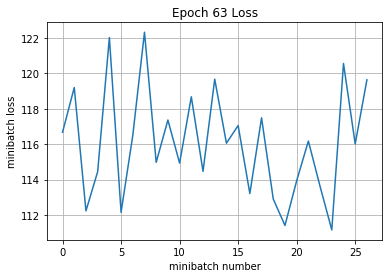

0.267275842376
Epoch 64, Overall loss = 1.79 and accuracy of 0.267


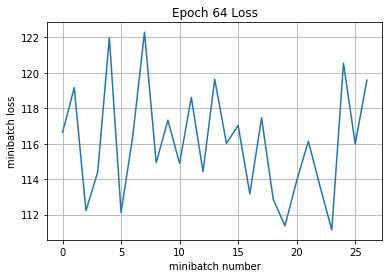

Iteration 1750: with minibatch training loss = 1.77 and accuracy of 0.2
0.266704740148
Epoch 65, Overall loss = 1.79 and accuracy of 0.267


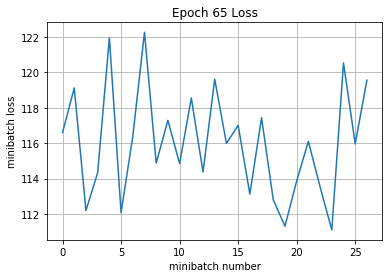

0.268989149058
Epoch 66, Overall loss = 1.79 and accuracy of 0.269


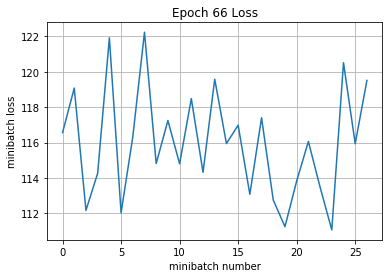

Iteration 1800: with minibatch training loss = 1.76 and accuracy of 0.34
0.269560251285
Epoch 67, Overall loss = 1.79 and accuracy of 0.27


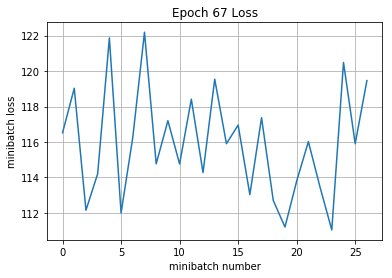

0.269560251285
Epoch 68, Overall loss = 1.79 and accuracy of 0.27


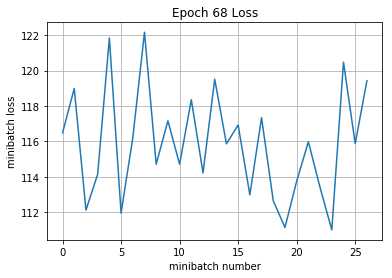

Iteration 1850: with minibatch training loss = 1.81 and accuracy of 0.19
0.270131353512
Epoch 69, Overall loss = 1.79 and accuracy of 0.27


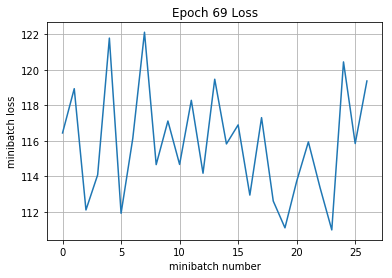

0.27070245574
Epoch 70, Overall loss = 1.79 and accuracy of 0.271


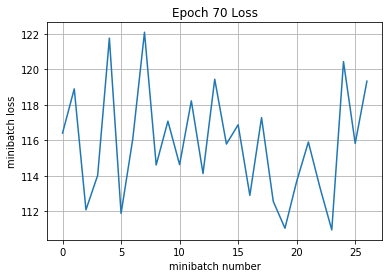

Iteration 1900: with minibatch training loss = 1.79 and accuracy of 0.31
0.268989149058
Epoch 71, Overall loss = 1.79 and accuracy of 0.269


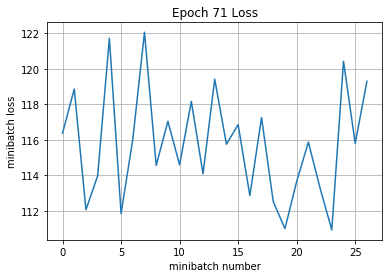

0.269560251285
Epoch 72, Overall loss = 1.78 and accuracy of 0.27


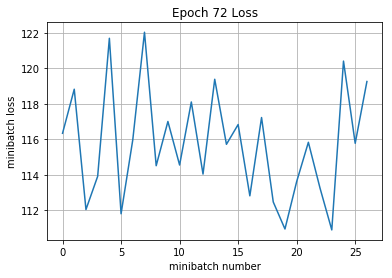

Iteration 1950: with minibatch training loss = 1.81 and accuracy of 0.31
0.270131353512
Epoch 73, Overall loss = 1.78 and accuracy of 0.27


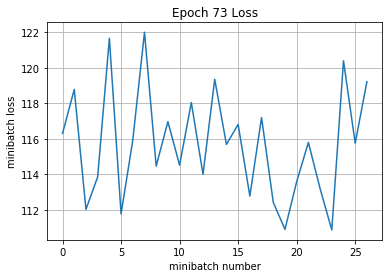

0.27070245574
Epoch 74, Overall loss = 1.78 and accuracy of 0.271


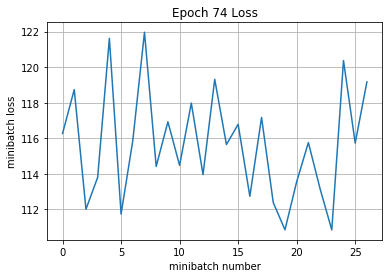

Iteration 2000: with minibatch training loss = 1.75 and accuracy of 0.31
0.272415762421
Epoch 75, Overall loss = 1.78 and accuracy of 0.272


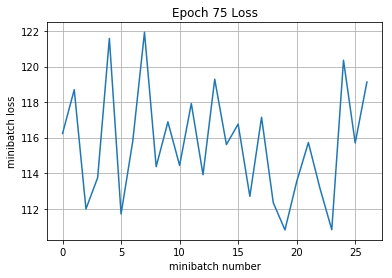

Iteration 2050: with minibatch training loss = 1.81 and accuracy of 0.27
0.274700171331
Epoch 76, Overall loss = 1.78 and accuracy of 0.275


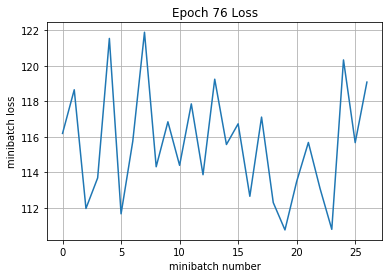

0.274700171331
Epoch 77, Overall loss = 1.78 and accuracy of 0.275


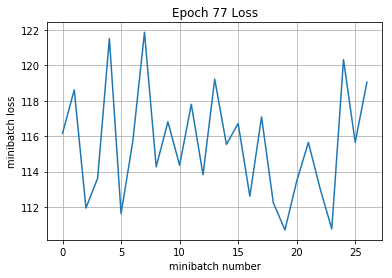

Iteration 2100: with minibatch training loss = 1.81 and accuracy of 0.3
0.27698458024
Epoch 78, Overall loss = 1.78 and accuracy of 0.277


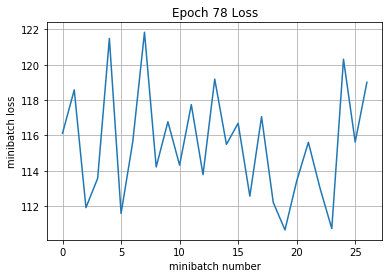

0.278126784694
Epoch 79, Overall loss = 1.78 and accuracy of 0.278


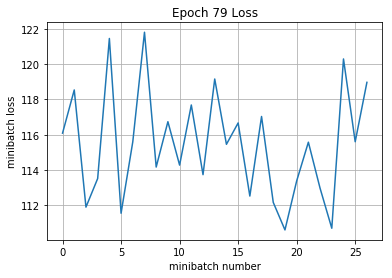

Iteration 2150: with minibatch training loss = 1.83 and accuracy of 0.28
0.278697886922
Epoch 80, Overall loss = 1.78 and accuracy of 0.279


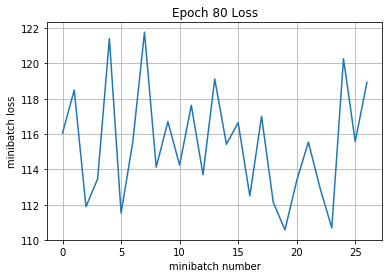

0.278697886922
Epoch 81, Overall loss = 1.78 and accuracy of 0.279


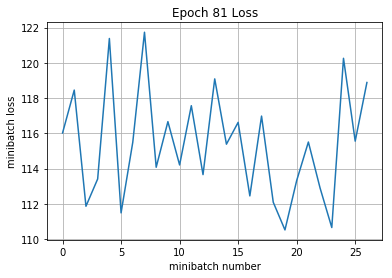

Iteration 2200: with minibatch training loss = 1.86 and accuracy of 0.28
0.278697886922
Epoch 82, Overall loss = 1.78 and accuracy of 0.279


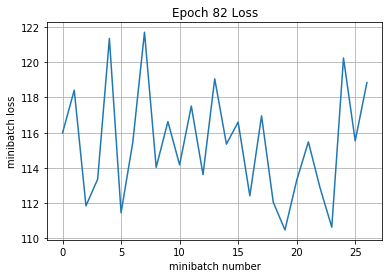

0.279840091376
Epoch 83, Overall loss = 1.78 and accuracy of 0.28


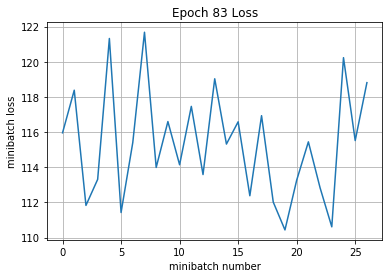

Iteration 2250: with minibatch training loss = 1.82 and accuracy of 0.25
0.280982295831
Epoch 84, Overall loss = 1.78 and accuracy of 0.281


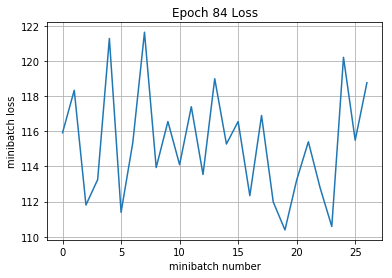

0.280411193604
Epoch 85, Overall loss = 1.78 and accuracy of 0.28


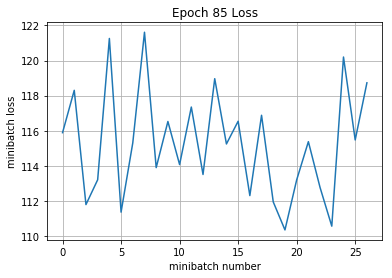

Iteration 2300: with minibatch training loss = 1.74 and accuracy of 0.34
0.280982295831
Epoch 86, Overall loss = 1.78 and accuracy of 0.281


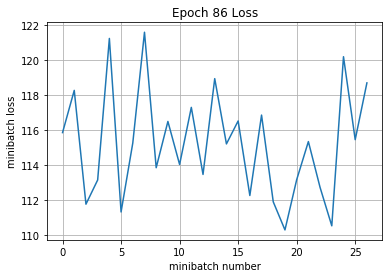

0.280411193604
Epoch 87, Overall loss = 1.78 and accuracy of 0.28


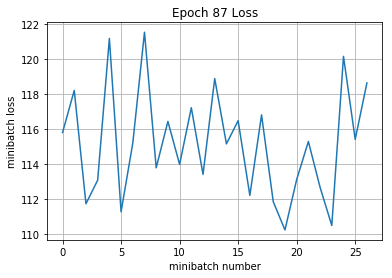

Iteration 2350: with minibatch training loss = 1.85 and accuracy of 0.25
0.280982295831
Epoch 88, Overall loss = 1.78 and accuracy of 0.281


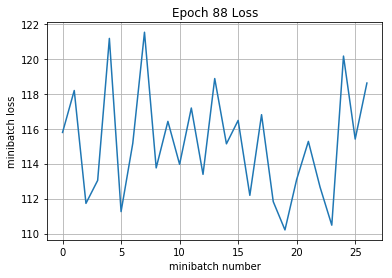

Iteration 2400: with minibatch training loss = 1.88 and accuracy of 0.2
0.280411193604
Epoch 89, Overall loss = 1.78 and accuracy of 0.28


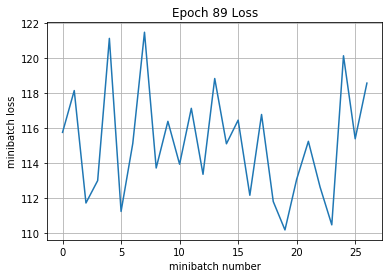

0.280411193604
Epoch 90, Overall loss = 1.77 and accuracy of 0.28


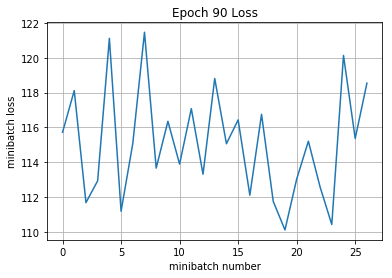

Iteration 2450: with minibatch training loss = 1.77 and accuracy of 0.22
0.280411193604
Epoch 91, Overall loss = 1.77 and accuracy of 0.28


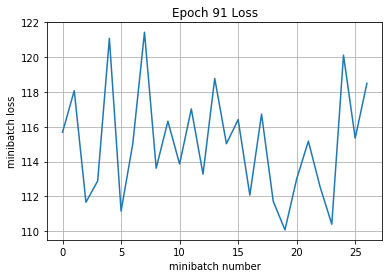

0.279840091376
Epoch 92, Overall loss = 1.77 and accuracy of 0.28


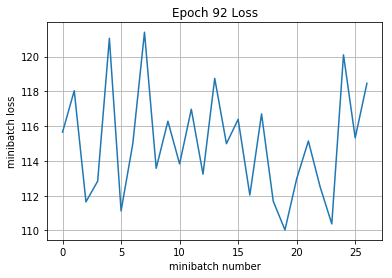

Iteration 2500: with minibatch training loss = 1.75 and accuracy of 0.34
0.280411193604
Epoch 93, Overall loss = 1.77 and accuracy of 0.28


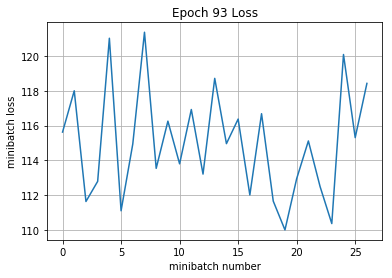

0.280982295831
Epoch 94, Overall loss = 1.77 and accuracy of 0.281


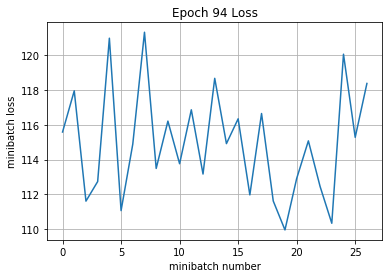

Iteration 2550: with minibatch training loss = 1.77 and accuracy of 0.33
0.281553398058
Epoch 95, Overall loss = 1.77 and accuracy of 0.282


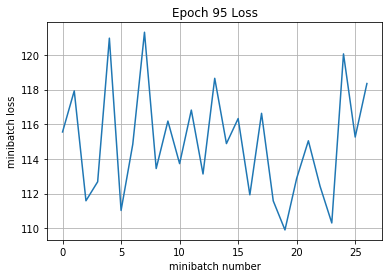

0.282124500286
Epoch 96, Overall loss = 1.77 and accuracy of 0.282


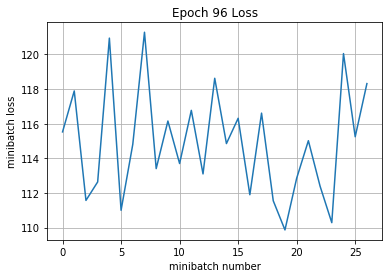

Iteration 2600: with minibatch training loss = 1.77 and accuracy of 0.27
0.281553398058
Epoch 97, Overall loss = 1.77 and accuracy of 0.282


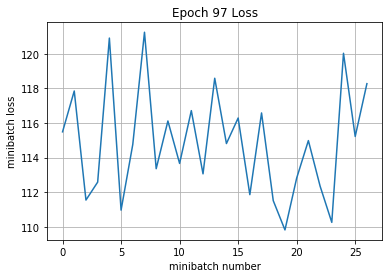

0.282695602513
Epoch 98, Overall loss = 1.77 and accuracy of 0.283


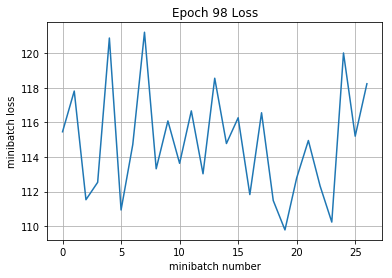

Iteration 2650: with minibatch training loss = 1.89 and accuracy of 0.27
0.282695602513
Epoch 99, Overall loss = 1.77 and accuracy of 0.283


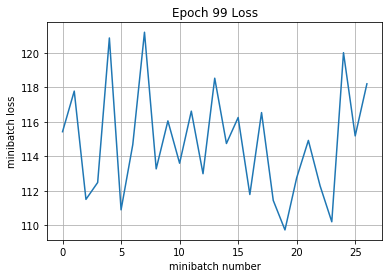

0.28326670474
Epoch 100, Overall loss = 1.77 and accuracy of 0.283


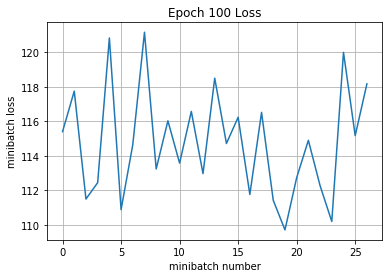

Iteration 2700: with minibatch training loss = 1.8 and accuracy of 0.31
0.28326670474
Epoch 101, Overall loss = 1.77 and accuracy of 0.283


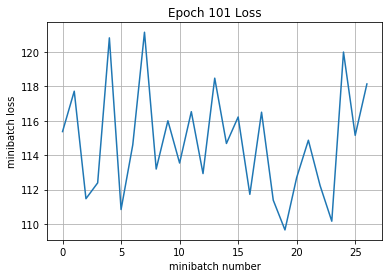

Iteration 2750: with minibatch training loss = 1.72 and accuracy of 0.31
0.283837806967
Epoch 102, Overall loss = 1.77 and accuracy of 0.284


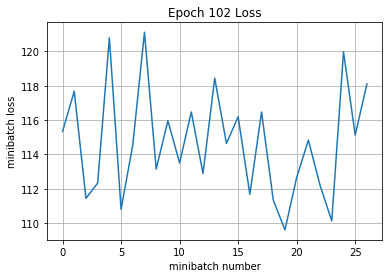

0.283837806967
Epoch 103, Overall loss = 1.77 and accuracy of 0.284


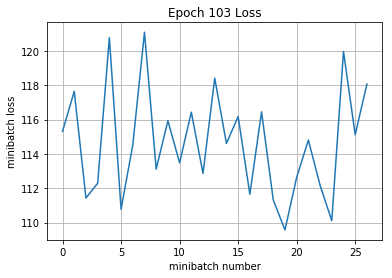

Iteration 2800: with minibatch training loss = 1.71 and accuracy of 0.34
0.283837806967
Epoch 104, Overall loss = 1.77 and accuracy of 0.284


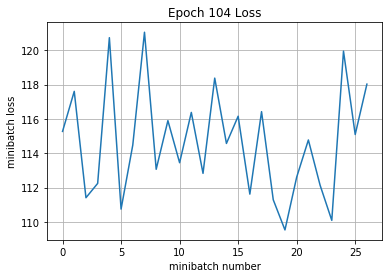

0.284408909195
Epoch 105, Overall loss = 1.77 and accuracy of 0.284


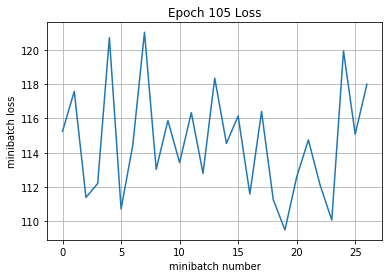

Iteration 2850: with minibatch training loss = 1.81 and accuracy of 0.31
0.284980011422
Epoch 106, Overall loss = 1.77 and accuracy of 0.285


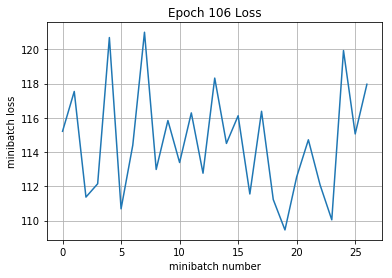

0.285551113649
Epoch 107, Overall loss = 1.77 and accuracy of 0.286


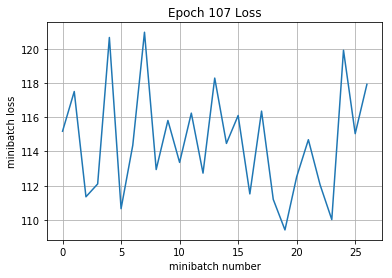

Iteration 2900: with minibatch training loss = 1.82 and accuracy of 0.27
0.285551113649
Epoch 108, Overall loss = 1.77 and accuracy of 0.286


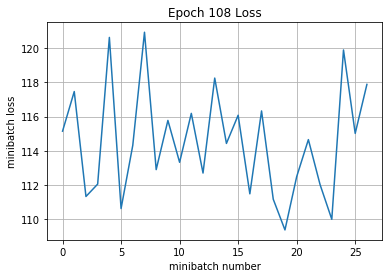

0.286122215877
Epoch 109, Overall loss = 1.77 and accuracy of 0.286


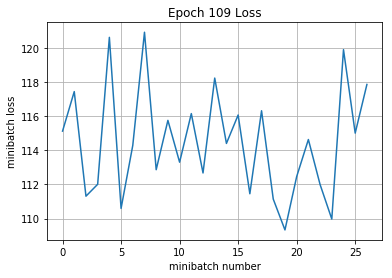

Iteration 2950: with minibatch training loss = 1.89 and accuracy of 0.23
0.286122215877
Epoch 110, Overall loss = 1.77 and accuracy of 0.286


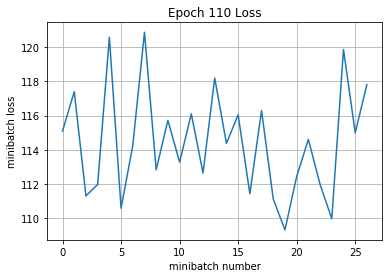

0.286693318104
Epoch 111, Overall loss = 1.76 and accuracy of 0.287


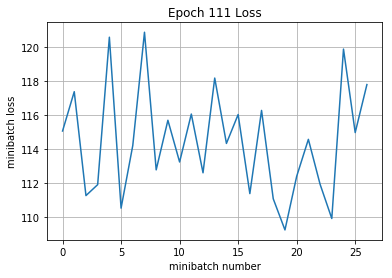

Iteration 3000: with minibatch training loss = 1.75 and accuracy of 0.38
0.287264420331
Epoch 112, Overall loss = 1.76 and accuracy of 0.287


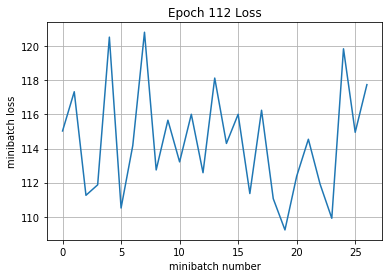

Iteration 3050: with minibatch training loss = 1.84 and accuracy of 0.2
0.287264420331
Epoch 113, Overall loss = 1.76 and accuracy of 0.287


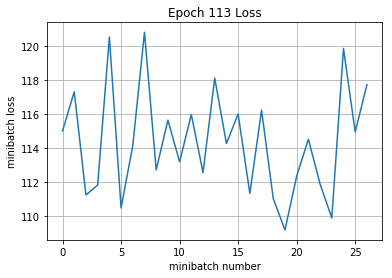

0.287835522559
Epoch 114, Overall loss = 1.76 and accuracy of 0.288


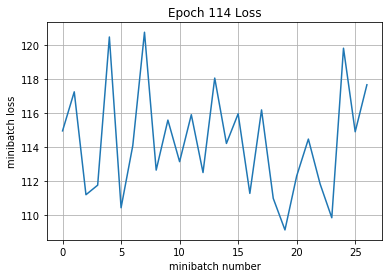

Iteration 3100: with minibatch training loss = 1.75 and accuracy of 0.22
0.287835522559
Epoch 115, Overall loss = 1.76 and accuracy of 0.288


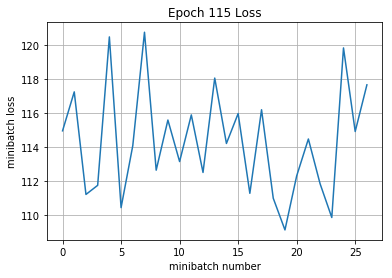

0.288406624786
Epoch 116, Overall loss = 1.76 and accuracy of 0.288


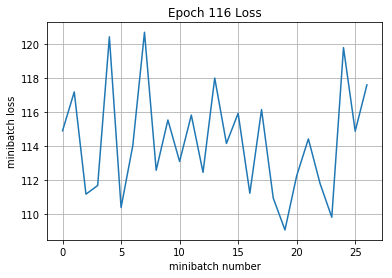

Iteration 3150: with minibatch training loss = 1.73 and accuracy of 0.36
0.288977727013
Epoch 117, Overall loss = 1.76 and accuracy of 0.289


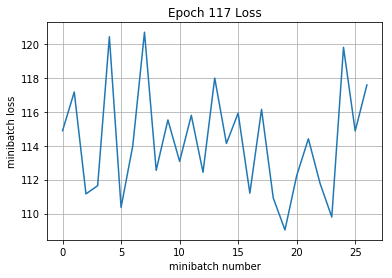

0.290119931468
Epoch 118, Overall loss = 1.76 and accuracy of 0.29


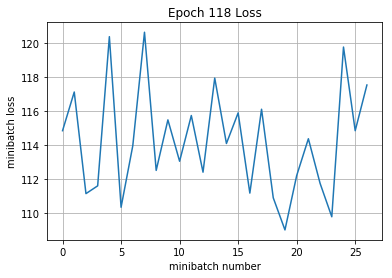

Iteration 3200: with minibatch training loss = 1.78 and accuracy of 0.25
0.290119931468
Epoch 119, Overall loss = 1.76 and accuracy of 0.29


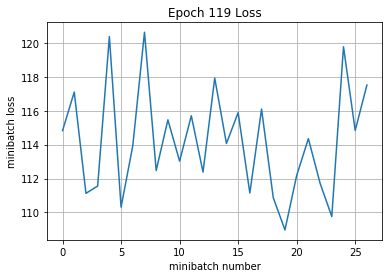

0.290691033695
Epoch 120, Overall loss = 1.76 and accuracy of 0.291


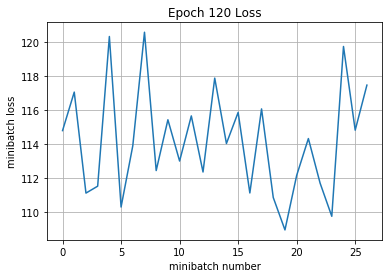

Iteration 3250: with minibatch training loss = 1.77 and accuracy of 0.31
0.291262135922
Epoch 121, Overall loss = 1.76 and accuracy of 0.291


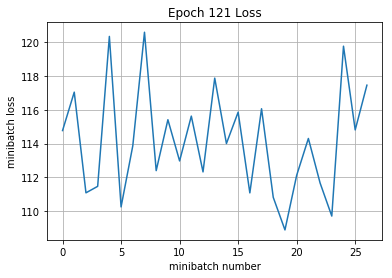

0.290691033695
Epoch 122, Overall loss = 1.76 and accuracy of 0.291


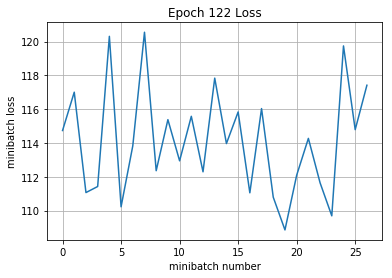

Iteration 3300: with minibatch training loss = 1.78 and accuracy of 0.36
0.290691033695
Epoch 123, Overall loss = 1.76 and accuracy of 0.291


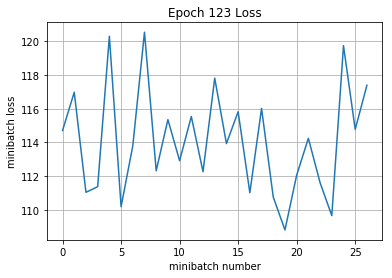

0.291262135922
Epoch 124, Overall loss = 1.76 and accuracy of 0.291


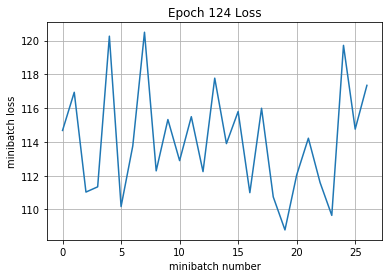

Iteration 3350: with minibatch training loss = 1.73 and accuracy of 0.33
0.290691033695
Epoch 125, Overall loss = 1.76 and accuracy of 0.291


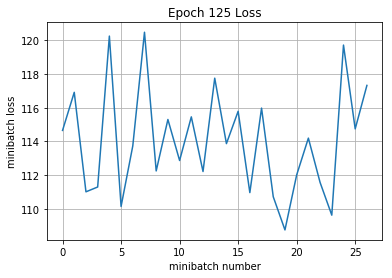

Iteration 3400: with minibatch training loss = 1.79 and accuracy of 0.3
0.291262135922
Epoch 126, Overall loss = 1.76 and accuracy of 0.291


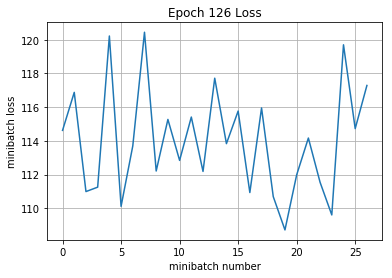

0.291262135922
Epoch 127, Overall loss = 1.76 and accuracy of 0.291


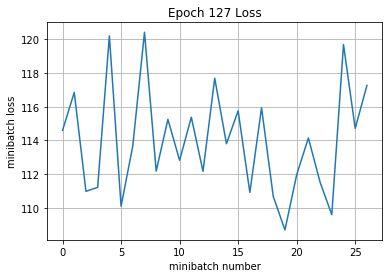

Iteration 3450: with minibatch training loss = 1.78 and accuracy of 0.36
0.291262135922
Epoch 128, Overall loss = 1.76 and accuracy of 0.291


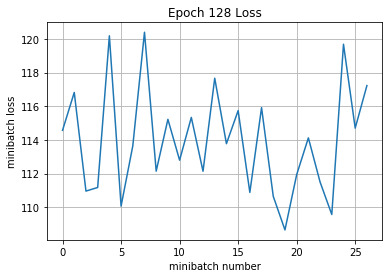

0.29183323815
Epoch 129, Overall loss = 1.76 and accuracy of 0.292


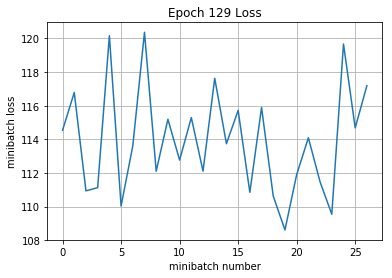

In [ ]:
run_model(session, y_out, loss, X_t2_features, y_t2, 
          epochs=10000, batch_size=64, print_every=50, training = train_step, plot_losses=True)

In [24]:
run_model(session, y_out, loss, X_val_features, y_val, 1, batch_size=5, print_every=20)

Iteration 0: with minibatch training loss = 3.17 and accuracy of 0.2
Iteration 20: with minibatch training loss = 1.63 and accuracy of 0.2
Iteration 40: with minibatch training loss = 1.57 and accuracy of 0.4
Iteration 60: with minibatch training loss = 3.52 and accuracy of 0
Iteration 80: with minibatch training loss = 2.66 and accuracy of 0.2
0.238979118329
Epoch 1, Overall loss = 2.21 and accuracy of 0.239
